# Import

In [286]:
%load_ext autoreload
%autoreload 2

import importlib
import numpy as np
import math
import itertools 
import pandas as pd
import numpy as np
import io
import msoffcrypto
from sklearn.metrics import r2_score
import openpyxl
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st
import json
from math import factorial as fact
from IPython.display import Markdown, display
import toml
import sys, os
import collections
from types import SimpleNamespace
import copy
import matplotlib.patches as mpatch
%matplotlib inline 
%config Completer.use_jedi = True

from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.cluster import KMeans
import numpy as np

# T new &

In [296]:
file = {'SheetMapName' : 'map T3', 'uploaded_file' : "data.xlsx",'DistFactor' : 0.1}
algo = load_data_brut(file)
dfline = algo.dfline.copy()
Comb = algo.Comb
Comb
algo.ListBusPactif = [False,False]
df = indiv_init(algo, 40)

Ne = len(algo.Comb['E'])
idx = df[(df.Pcount==1)].sort_values(ascending=False,by = 'Ecount').index[0]
indiv = algo.indivs[idx]

Init algo namespace
['E0', 'E1', 'E2', 'E3', 'E4'] [('E0', 'E1'), ('E0', 'E2'), ('E0', 'E3'), ('E0', 'E4'), ('E1', 'E0'), ('E1', 'E2'), ('E1', 'E3'), ('E1', 'E4'), ('E2', 'E0'), ('E2', 'E1'), ('E2', 'E3'), ('E2', 'E4'), ('E3', 'E0'), ('E3', 'E1'), ('E3', 'E2'), ('E3', 'E4'), ('E4', 'E0'), ('E4', 'E1'), ('E4', 'E2'), ('E4', 'E3')]
['T0', 'T1', 'T2', 'T3', 'P0', 'P1'] [('T0', 'T1'), ('T0', 'T2'), ('T0', 'T3'), ('T0', 'P0'), ('T0', 'P1'), ('T1', 'T0'), ('T1', 'T2'), ('T1', 'T3'), ('T1', 'P0'), ('T1', 'P1'), ('T2', 'T0'), ('T2', 'T1'), ('T2', 'T3'), ('T2', 'P0'), ('T2', 'P1'), ('T3', 'T0'), ('T3', 'T1'), ('T3', 'T2'), ('T3', 'P0'), ('T3', 'P1'), ('P0', 'T0'), ('P0', 'T1'), ('P0', 'T2'), ('P0', 'T3'), ('P0', 'P1'), ('P1', 'T0'), ('P1', 'T1'), ('P1', 'T2'), ('P1', 'T3'), ('P1', 'P0')]
['confs', 'map', 'map bis', 'map s2', 'map (2)', 'map (3)', 'map T', 'map T2', 'map T3']


{'C': [0, 1, 2, 3, 4, 5, 6, 7],
 'E': [0, 1, 2, 3, 4],
 'T': [0, 1, 2, 3],
 'P': [0, 1]}

In [318]:
BusTNames = []
for p in indiv['Plist']:
    L = Tconnection_v4(algo, indiv,p)
    BusTNames = BusTNames + L
BusTNames

P0 ['T2', 'T1'] ['P0-T2', 'T2-T1'] {'T1': ['E1'], 'T2': ['E2']}
P1 ['T3'] ['P1-T3', 'T3-T0'] {'T3': ['E3']}


['P0-T2',
 'T2-E2',
 'E2-C1',
 'E2-C4',
 'T2-T1',
 'T1-E1',
 'E1-C0',
 'E1-C2',
 'E1-C6',
 'P1-T3',
 'T3-E3',
 'E3-C3',
 'E3-C5',
 'E3-C7']

In [317]:
Name ="E1-C0,E1-C2,E1-C6,E2-C1,E2-C4,E3-C3,E3-C5,E3-C7,P0-E1,P0-E2,P1-E3"
# Name = "E0-C3,E0-C5,E0-C6,E1-C0,E2-C1,E2-C2,E2-C4,E2-C7,P0-E1,P0-E2,P1-E0"
indiv  = Indiv_reverse(Name,algo)


Indiv_reverse [0, 1, 2, 3, 4, 5, 6, 7] [1, 2, 1, 3, 2, 3, 1, 3] [0, 0, 1]


(11, 9)


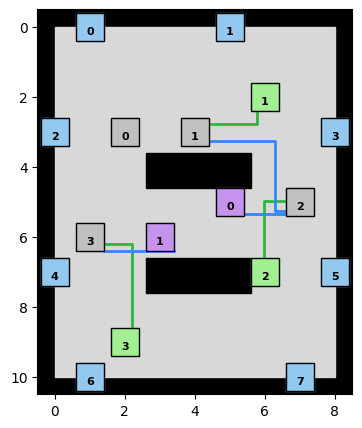

In [319]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1','T2','T3']
SelectLine = BusTNames
# SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot,True)
fig.set_size_inches(5,5)

## verif

In [271]:
file = {'SheetMapName' : 'map T2', 'uploaded_file' : "data.xlsx",'DistFactor' : 0.1}
algo = load_data_brut(file)
dfline = algo.dfline.copy()
Comb = algo.Comb
Comb

Init algo namespace
['E0', 'E1', 'E2', 'E3', 'E4'] [('E0', 'E1'), ('E0', 'E2'), ('E0', 'E3'), ('E0', 'E4'), ('E1', 'E0'), ('E1', 'E2'), ('E1', 'E3'), ('E1', 'E4'), ('E2', 'E0'), ('E2', 'E1'), ('E2', 'E3'), ('E2', 'E4'), ('E3', 'E0'), ('E3', 'E1'), ('E3', 'E2'), ('E3', 'E4'), ('E4', 'E0'), ('E4', 'E1'), ('E4', 'E2'), ('E4', 'E3')]
['T0', 'T1', 'T2', 'P0'] [('T0', 'T1'), ('T0', 'T2'), ('T0', 'P0'), ('T1', 'T0'), ('T1', 'T2'), ('T1', 'P0'), ('T2', 'T0'), ('T2', 'T1'), ('T2', 'P0'), ('P0', 'T0'), ('P0', 'T1'), ('P0', 'T2')]
['confs', 'map', 'map bis', 'map s2', 'map (2)', 'map (3)', 'map T', 'map T2', 'map T3']


{'C': [0, 1, 2, 3, 4, 5, 6, 7], 'E': [0, 1, 2, 3, 4], 'T': [0, 1, 2], 'P': [0]}

In [255]:
Name = "E0-C0,E0-C2,E1-C5,E2-C1,E2-C3,E2-C4,P0-E0,P0-E1,P0-E2"
indiv  = Indiv_reverse(Name,algo)

Indiv_reverse [0, 1, 2, 3, 4, 5] [0, 2, 0, 2, 2, 1] [0, 0, 0]


In [256]:
BusTNames = Tconnection_v3(algo, indiv,0)
BusTNames

P0 ['T1', 'T0'] ['P0-T1', 'T1-T0']
{'T1': [('E0', 'E1'), ('E1', 'T1'), ('E2', 'T1')], 'T0': [('E1', 'E0'), ('E0', 'T0')]} ['P0-T1', 'T1-T0']
T1 {'E0', 'E1'}
T1 {'E2'}
T0 {'E0', 'E1'}


['P0-T1',
 'T1-E0',
 'E0-E1',
 'E0-C0',
 'E0-C2',
 'E1-C5',
 'T1-E2',
 'E2-C1',
 'E2-C3',
 'E2-C4',
 'T1-T0',
 'T0-E0',
 'E0-E1',
 'E0-C0',
 'E0-C2',
 'E1-C5']

(10, 7)


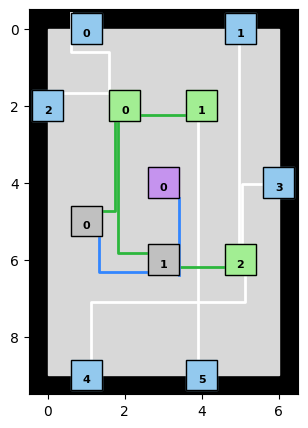

In [257]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1']
SelectLine = BusTNames
# SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [258]:
pn = 0
p = 'P{}'.format(pn)
PtoTConnect = algo.PtoTConnect[p]
Tconnect = PtoTConnect
TconnectPath = Line_Name([p] + Tconnect)
Tlist = Tconnect
print(p , Tconnect,TconnectPath)

G0 = algo.G0.copy()

p = 'P{}'.format(p)
Elist = indiv['Pconnect'][pn]
ElistName = ['E{}'.format(e) for e in Elist]
Elist = ElistName.copy()

SlotName = ElistName + Tlist
L = []
# backward sur chaque E pour 

P0 ['T1', 'T0'] ['P0-T1', 'T1-T0']


In [269]:
G0 = algo.G0
Start  = Tconnect
Target = Elist
SlotNames =Start + Target
L = []
# backward sur chaque E pour connaitre le bus le plus court vers le plus proche T
DictPath = collections.defaultdict(list)
G = G0.subgraph(SlotNames).copy()
for i, t in enumerate(Target):  
    NodesDist = [G[t][p]['dist'] for p in Start]
    n = Start[np.array(NodesDist).argmin()]
    DictPath[n].append(t)
DictTpath = dict(DictPath)

DictTpath
BusTNames = []
DictPath2 = collections.defaultdict(list)

for i in range(len(Tconnect)):
        t = Tconnect[i]  
        BusTNames.append(TconnectPath[i])
        if t in DictTpath.keys():
            e_list = DictTpath[t]
            Glist = [t] + list(e_list)
            G = G0.subgraph(Glist).copy()
            n = t
            FinalPath  = [n]  
            i+=1  
            while G.size()>0 :
                NodesAdj  = [x[0] for x in G.adj[n].items()]
                NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
                ns = n
                G.remove_node(n)
                n = NodesAdj[np.array(NodesDist).argmin()]
                FinalPath.append(n)
                BusTNames.append("{}-{}".format(ns,n))
            for e in e_list:
                Clist = indiv['Econnect'][int(e[1:])]
                for c in Clist:
                    BusTNames.append("{}-C{}".format(e,c))
            FinalPath  
BusTNames           


# for k, e_list in DictPath.items():
#     G = G0.subgraph([k] + Slist).copy()
#     # print([p] + Tlist)
#     n = k
#     Sconnect = [] 
#     SconnectPath = []
#     while G.size()>0 :
#         NodesAdj  = [x[0] for x in G.adj[n].items()]
#         NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
#         ns = n
#         G.remove_node(n)
#         n = NodesAdj[np.array(NodesDist).argmin()]
#         print(k,ns ,n)
# #         Sconnect.append(n)
# #         SconnectPath.append("{}-{}".format(ns,n))
#         DictPath2[k].append(n)
    
DictPath2 = dict(DictPath2)

DictPath2

{'T0': ['E0'], 'T1': ['E1', 'E2']}

['T1', 'E2', 'E1']

['T0', 'E0']

['P0-T1',
 'T1-E2',
 'E2-E1',
 'E1-C5',
 'E2-C1',
 'E2-C3',
 'E2-C4',
 'T1-T0',
 'T0-E0',
 'E0-C0',
 'E0-C2']

{}

(10, 7)


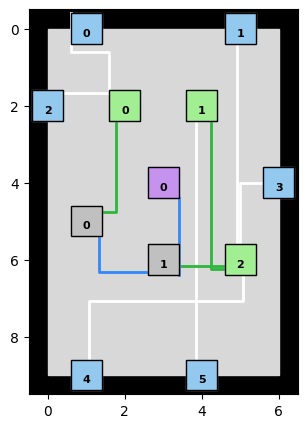

In [270]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1']
SelectLine = BusTNames
# SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

## Run

In [272]:
file = {'SheetMapName' : 'map T2', 'uploaded_file' : "data.xlsx",'DistFactor' : 0.1}
algo = load_data_brut(file)
dfline = algo.dfline.copy()
Comb = algo.Comb
Comb
# algo.A0

Init algo namespace
['E0', 'E1', 'E2', 'E3', 'E4'] [('E0', 'E1'), ('E0', 'E2'), ('E0', 'E3'), ('E0', 'E4'), ('E1', 'E0'), ('E1', 'E2'), ('E1', 'E3'), ('E1', 'E4'), ('E2', 'E0'), ('E2', 'E1'), ('E2', 'E3'), ('E2', 'E4'), ('E3', 'E0'), ('E3', 'E1'), ('E3', 'E2'), ('E3', 'E4'), ('E4', 'E0'), ('E4', 'E1'), ('E4', 'E2'), ('E4', 'E3')]
['T0', 'T1', 'T2', 'P0'] [('T0', 'T1'), ('T0', 'T2'), ('T0', 'P0'), ('T1', 'T0'), ('T1', 'T2'), ('T1', 'P0'), ('T2', 'T0'), ('T2', 'T1'), ('T2', 'P0'), ('P0', 'T0'), ('P0', 'T1'), ('P0', 'T2')]
['confs', 'map', 'map bis', 'map s2', 'map (2)', 'map (3)', 'map T', 'map T2', 'map T3']


{'C': [0, 1, 2, 3, 4, 5, 6, 7], 'E': [0, 1, 2, 3, 4], 'T': [0, 1, 2], 'P': [0]}

In [251]:
 BusTNames = Tconnection_v3(algo, indiv,0)

P0 ['T1', 'T0'] ['P0-T1', 'T1-T0']
{'T1': [('E0', 'E1'), ('E1', 'E2'), ('E2', 'T1'), ('E2', 'T1')], 'T0': [('E1', 'E0'), ('E0', 'T0')]} ['P0-T1', 'T1-T0']
T1 {'E0', 'E2', 'E1'}
T0 {'E0', 'E1'}


['P0-T1',
 'T1-E2',
 'E2-E1',
 'E1-E0',
 'E0-C0',
 'E0-C2',
 'E2-C1',
 'E2-C3',
 'E2-C4',
 'E1-C5',
 'T1-T0',
 'T0-E0',
 'E0-E1',
 'E0-C0',
 'E0-C2',
 'E1-C5']

In [273]:
algo.ListBusPactif = [False]

In [274]:
# generation de 10 indivs
df = indiv_init(algo, 40)
# df.columns
indiv = algo.indivs[1]

In [86]:
df[df.Ecount==6]

,Clist,CtoE,Econnect,Elist,Ecount,EtoP,Pconnect,Plist,Pcount,Ptype0,...,Esplit,Debit,EvCount,EvSum,Masse,Cout,DetailsMasse,DetailsCout,fitness,Alive
33,"[0, 1, 2, 3, 4, 5, 6, 7]","[0, 2, 5, 2, 3, 3, 1, 4]","{0: [0], 1: [6], 2: [1, 3], 3: [4, 5], 4: [7],...","[0, 1, 2, 3, 4, 5]",6,"[0, 0, 0, 0, 0, 0]","{0: [0, 1, 2, 3, 4, 5]}",[0],1,"[Pc, Pc, Pa, Pc, Pa, Pa]",...,{},87.7,{},0,1099,35,"{'Pompe': 136.0, 'Tuyau': 363.4, 'EV': 0.0, 'R...","{'Pompe': 2.5, 'Tuyau': 2.8, 'EV': 0.0, 'Reser...",790,True
35,"[0, 1, 2, 3, 4, 5, 6, 7]","[3, 1, 5, 4, 2, 5, 0, 2]","{0: [6], 1: [1], 2: [4, 7], 3: [0], 4: [3], 5:...","[0, 1, 2, 3, 4, 5]",6,"[0, 0, 0, 0, 0, 0]","{0: [0, 1, 2, 3, 4, 5]}",[0],1,"[Pa, Pa, Pa, Pc, Pa, Pa]",...,{},87.6,{},0,1214,36,"{'Pompe': 136.0, 'Tuyau': 478.4, 'EV': 0.0, 'R...","{'Pompe': 2.5, 'Tuyau': 3.6, 'EV': 0.0, 'Reser...",1040,True


In [275]:
Ne = len(algo.Comb['E'])
idx = df[df.Ecount==Ne].index[0]
Ne
indiv = algo.indivs[idx]

5

In [93]:
BusTNames = Tconnection_v2(algo, indiv)

['T2', 'T0', 'T1'] ['P0-T2', 'T2-T0', 'T0-T1']


(11, 9)


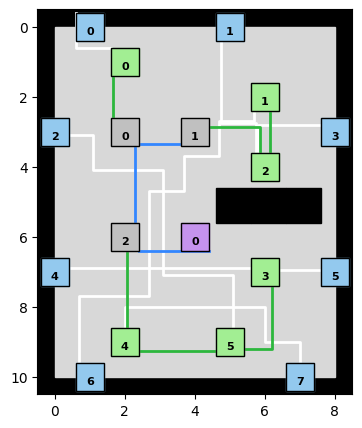

In [90]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1','T2']
SelectLine = BusTNames
# SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [64]:
# algo.GroupDict = [1,1,0]
Name = "E0-C0,E1-C1,E2-C2,E3-C3,P0-E0,P0-E1,P0-E2,P0-E3"
indiv  = Indiv_reverse(Name,algo)

Indiv_reverse [0, 1, 2, 3] [0, 1, 2, 3] [0, 0, 0, 0]


In [64]:
# algo.GroupDict = [1,1,0]
Name = "E0-C0,E1-C1,E2-C2,E3-C3,P0-E0,P0-E1,P0-E2,P0-E3"
indiv  = Indiv_reverse(Name,algo)

Indiv_reverse [0, 1, 2, 3] [0, 1, 2, 3] [0, 0, 0, 0]


In [256]:
%%timeit
BusTNames, distT = T_connection(algo, indiv)

7.76 ms ± 78.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Ini P to T

In [246]:
file = {'SheetMapName' : 'map bis', 'uploaded_file' : "data.xlsx",'DistFactor' : 0.1}
algo = load_data_brut(file)
dfline = algo.dfline.copy()
Comb = algo.Comb
Comb
# algo.A0

Init algo namespace
['E0', 'E1', 'E2', 'E3'] [('E0', 'E1'), ('E0', 'E2'), ('E0', 'E3'), ('E1', 'E0'), ('E1', 'E2'), ('E1', 'E3'), ('E2', 'E0'), ('E2', 'E1'), ('E2', 'E3'), ('E3', 'E0'), ('E3', 'E1'), ('E3', 'E2')]
['confs', 'map', 'map bis', 'map s2', 'map (2)', 'map (3)', 'map T', 'map T2', 'map T3']


{'C': [0, 1, 2, 3, 4], 'E': [0, 1, 2, 3], 'P': [0, 1]}

In [236]:
PToT_path(algo)

{'P0': ['T2', 'T0', 'T1']}

In [232]:
G0 = algo.G0
Start  = ['P{}'.format(t) for t in algo.Comb['P']]
Target = ['T{}'.format(t) for t in algo.Comb['T']]
SlotNames =Start + Target
L = []
# backward sur chaque E pour connaitre le bus le plus court vers le plus proche T
DictPath = collections.defaultdict(list)
G = G0.subgraph(SlotNames).copy()
for i, t in enumerate(Target):  
    NodesDist = [G[t][p]['dist'] for p in Start]
    n = Start[np.array(NodesDist).argmin()]
    DictPath[n].append(t)

DictPath2 = collections.defaultdict(list)
for k, Slist in dict(DictPath).items():
    G = G0.subgraph([k] + Slist).copy()
    # print([p] + Tlist)
    n = k
    Sconnect = [] 
    SconnectPath = []
    while G.size()>0 :
        NodesAdj  = [x[0] for x in G.adj[n].items()]
        NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
        ns = n
        G.remove_node(n)
        n = NodesAdj[np.array(NodesDist).argmin()]
#         Sconnect.append(n)
#         SconnectPath.append("{}-{}".format(ns,n))
        DictPath2[k].append(n)
DictPath2 = dict(DictPath2)
DictPath2

{'P1': ['T3', 'T0'], 'P0': ['T2', 'T1']}

In [ ]:
G = G0.subgraph([p] + Tlist).copy()
# print([p] + Tlist)
n = p
Tconnect = [] 
TconnectPath = []
while G.size()>0 :
    NodesAdj  = [x[0] for x in G.adj[n].items()]
    NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
    ns = n
    G.remove_node(n)
    n = NodesAdj[np.array(NodesDist).argmin()]
    TconnectPath.append("{}-{}".format(ns,n))
    Tconnect.append(n)
print(Tconnect,TconnectPath)

In [238]:
# generation de 10 indivs
algo.ListBusPactif = [False,False]
df = indiv_init(algo, 30)
# df.columns
indiv = algo.indivs[1]

In [239]:
Ne = len(algo.Comb['E'])
idx = df[(df.Pcount==2)].sort_values(ascending=False,by = 'Ecount').index[0]
indiv = algo.indivs[idx]

(11, 9)


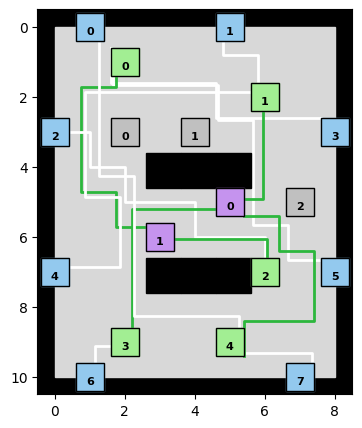

In [240]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1','T2']
# SelectLine = BusTNames
SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

(11, 9)


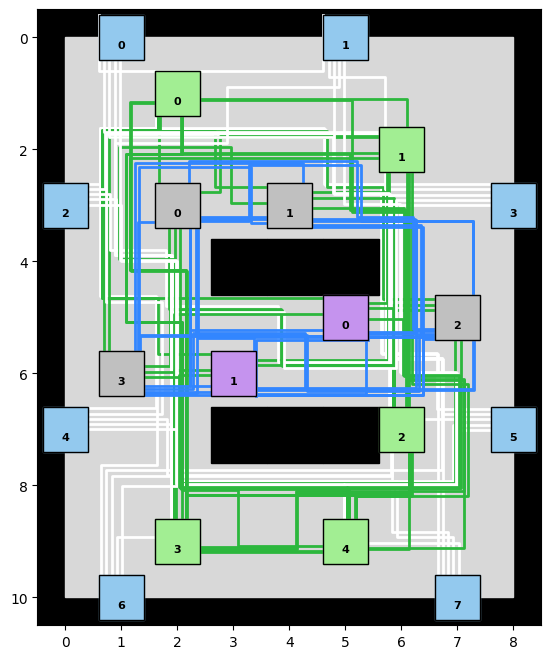

In [228]:
SelectLine = algo.DictLine.keys()
SelectSlot = algo.DictPos.keys()

fig = new_plot(algo, SelectLine, SelectSlot)

In [213]:
algo.PtoTConnect
indiv['Pconnect']

defaultdict(list, {'P1': ['T0', 'T3'], 'P0': ['T1', 'T2']})

{0: [2, 3, 4], 1: [0, 1]}

In [241]:
BusTNames = []
for p in indiv['Plist']:
    L = Tconnection_v3(algo, indiv,p)
    BusTNames = BusTNames + L
BusTNames

P0 ['T2', 'T1'] ['P0-T2', 'T2-T1']
{'T1': [('E1', 'T1')], 'T2': [('E3', 'E4'), ('E4', 'T2'), ('E4', 'E3'), ('E3', 'T2')]} ['P0-T2', 'T2-T1']
T2 {'E4', 'E3'}
T1 {'E1'}
P1 ['T3', 'T0'] ['P1-T3', 'T3-T0']
{'T0': [('E0', 'T0'), ('E2', 'T0')]} ['P1-T3', 'T3-T0']
T0 {'E0'}
T0 {'E2'}


['P0-T2',
 'T2-E4',
 'E4-E3',
 'E4-C0',
 'E4-C7',
 'E3-C6',
 'T2-T1',
 'T1-E1',
 'E1-C1',
 'E1-C4',
 'P1-T3',
 'T3-T0',
 'T0-E0',
 'E0-C3',
 'E0-C5',
 'T0-E2',
 'E2-C2']

In [141]:
algo.Comb['T']

[0, 1, 2]

(11, 9)


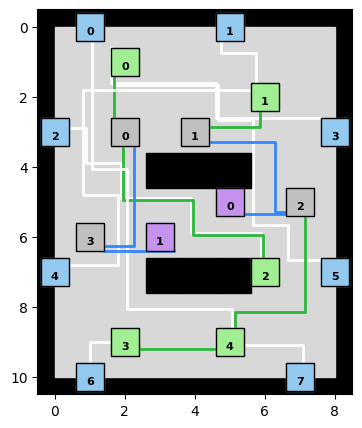

In [242]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1','T2','T3']
SelectLine = 

# SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

## refacto cluster V2

In [263]:
%%time
BusTNames = Tconnection_v2(algo, indiv)
# BusTNames

CPU times: total: 0 ns
Wall time: 2.01 ms


(11, 9)


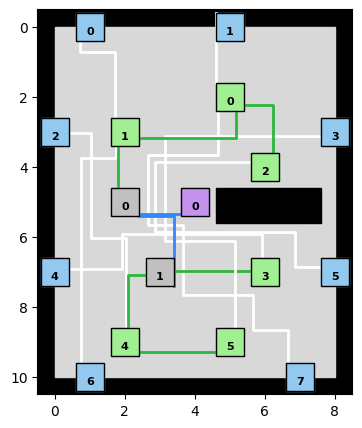

In [18]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1']
SelectLine = BusTNames
# SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [235]:
DictLine = algo.DictLine
Tlist = ['T{}'.format(t) for t in algo.Comb['T']]
G0 = nx.from_pandas_edgelist(algo.dfline, 's', 't', ['dist'])
for i, (p,Elist) in enumerate(indiv['Pconnect'].items()): 
    pass
p = 'P{}'.format(p)
ElistName = ['E{}'.format(e) for e in Elist]
Elist = ElistName.copy()


G = G0.subgraph([p] + Tlist).copy()
n = p
Tconnect = [] 
TconnectPath = []
while G.size()>0 :
    NodesAdj  = [x[0] for x in G.adj[n].items()]
    NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
    ns = n
    G.remove_node(n)
    n = NodesAdj[np.array(NodesDist).argmin()]
    TconnectPath.append("{}-{}".format(ns,n))
    Tconnect.append(n)
Tconnect
TconnectPath

['T0', 'T1']

['P0-T0', 'T0-T1']

In [205]:
SlotName = ElistName + Tlist
SlotName    
L = []

DictTpath = collections.defaultdict(list)
for i, e0 in enumerate(Elist):
    G = G0.subgraph(SlotName).copy()
    n = e0
    l = []
    path = []
    while n[0]!='T':
        NodesAdj  = [x[0] for x in G.adj[n].items()]
        NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
        ns = n
        l.append(ns)
        G.remove_node(n)
        n = NodesAdj[np.array(NodesDist).argmin()]
        print(e0,ns,n)
        path.append((ns,n))
    DictTpath[n] = DictTpath[n] + path
    L.append(l)
    # print(n,e0,l , path, np.argmax(A == e0, axis=1)) 
# passage hotvectors pour clustering => regrouper les lignes avec des E communs

['E0', 'E1', 'E2', 'E3', 'E4', 'E5', 'T0', 'T1']

E0 E0 E2
E0 E2 T0
E1 E1 T0
E2 E2 E0
E2 E0 E1
E2 E1 T0
E3 E3 T1
E4 E4 T1
E5 E5 E3
E5 E3 T1


In [216]:
TconnectPath

['P0-T0', 'T0-T1']

In [221]:
#16.6 µs ± 55 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Lgroup = []
G0 = nx.from_pandas_edgelist(algo.dfline, 's', 't', ['dist'])
BusTNames = []
for i in range(len(Tconnect)):
    t = Tconnect[i]    
    path = dict(DictTpath)[t]
    BusTNames.append(TconnectPath[i])
    Gg = nx.Graph(path)
    Gg.remove_node(t)
    List_sub_G = nx.connected_components(Gg)
    for e_list in List_sub_G:        
        Glist = [t] + list(e_list)
        G = G0.subgraph(Glist).copy()
        n = t
        FinalPath  = [n]    
        while G.size()>0 :
            NodesAdj  = [x[0] for x in G.adj[n].items()]
            NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
            ns = n
            G.remove_node(n)
            n = NodesAdj[np.array(NodesDist).argmin()]
            FinalPath.append(n)
            BusTNames.append("{}-{}".format(ns,n))
        for e in e_list:
            Clist = indiv['Econnect'][int(e[1:])]
            for c in Clist:
                BusTNames.append("{}-C{}".format(e,c))
        FinalPath
BusTNames


['T0', 'E1', 'E0', 'E2']

['T1', 'E3', 'E5']

['T1', 'E4']

['P0-T0',
 'T0-E1',
 'E1-E0',
 'E0-E2',
 'E2-C1',
 'E0-C6',
 'E1-C0',
 'E1-C4',
 'T0-T1',
 'T1-E3',
 'E3-E5',
 'E5-C7',
 'E3-C5',
 'T1-E4',
 'E4-C2',
 'E4-C3']

(11, 9)


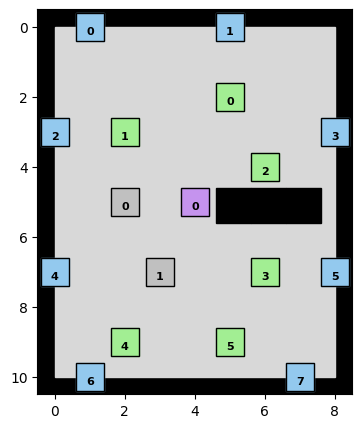

In [234]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0','T1']
SelectLine = BusTNames
# SelectLine = indiv['BusName']
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [224]:
dfline[dfline.Connect == 'TT']

,ID,path,dist,duriteType,s,t,Connect,duriteVal


In [198]:
G = nx.Graph(path)
list(nx.bfs_edges(G, "T0"))
G.remove_node('T0')
# isolates = list(nx.isolates(G))
# isolates
# G.remove_node(isolates)
# nx.draw(G, with_labels = True)
sub_graphs = nx.connected_components(G)
sub_graphs = list(sub_graphs)
list(sub_graphs[0])
sub_graphs
# list(sub_graphs)
# list(sub_graphs)
# G = sub_graphs[0]
# nx.draw(G, with_labels = True)

NetworkXError: The node T0 is not in the graph.

In [ ]:
G0 = nx.Graph(path)

for T in Tlist:
    G = G.copy()
    

In [ ]:
G = G0.subgraph(SlotName).copy()

## save perf graph create copy

In [16]:
%%time
BusTNames, distT = T_connection(algo, indiv)
# BusTNames

CPU times: total: 0 ns
Wall time: 6.95 ms


In [17]:
%%time
BusTNames = Tconnection_v2(algo, indiv)
# BusTNames

CPU times: total: 0 ns
Wall time: 2.53 ms


In [20]:
%%time
BusTNames = Tconnection_v2(algo, indiv)

CPU times: total: 0 ns
Wall time: 1.39 ms


In [21]:
%%time
BusTNames = Tconnection_v2(algo, indiv)

CPU times: total: 0 ns
Wall time: 993 µs


In [25]:
%%time
BusTNames = Tconnection_v2(algo, indiv)

CPU times: total: 0 ns
Wall time: 498 µs


In [37]:
%%timeit
BusTNames = Tconnection_v2(algo, indiv)

289 µs ± 5.88 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [76]:
%%timeit
BusTNames = Tconnection_v2(algo, indiv)

946 µs ± 29.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [77]:
%%timeit
BusTNames = Tconnection_v2(algo, indiv)

1.26 ms ± 22.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [79]:
BusTNames = Tconnection_v2(algo, indiv)

In [53]:
%%timeit
G0 = nx.from_pandas_edgelist(algo.dfline, 's', 't', ['dist'])

193 µs ± 11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [55]:
%%timeit
G0 = nx.from_pandas_edgelist(algo.dfline, 's', 't', ['dist'])
G0.remove_node('E4')

201 µs ± 3.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [57]:
%%timeit
G0 = nx.from_pandas_edgelist(algo.dfline, 's', 't', ['dist'])
G = G0.copy()

368 µs ± 5.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [60]:
%%timeit
# G0 = nx.from_pandas_edgelist(algo.dfline, 's', 't', ['dist'])
G = copy.deepcopy(G0)

470 µs ± 8.94 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [61]:
%%timeit
G = G0.copy()

173 µs ± 687 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [58]:
%%timeit
dfx = dfline.copy()

30.6 µs ± 884 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [39]:
%%timeit
G = G0.subgraph(['E0', 'E1', 'E2', 'E3', 'E4', 'E5']).copy()

115 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [57]:
%%timeit
G0 = nx.from_pandas_edgelist(algo.dfline, 's', 't', ['dist'])
G = G0.copy()

368 µs ± 5.97 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## refacto cluster 

In [39]:
A = np.random.randint(0,2,(6,6))
A

array([[0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0]])

In [40]:
def Path_N(A,start): 
    N = len(A)
    v0 = np.array([-1,1,-N,N])
    #     v0 = np.array([-1,1,-N,N, -N-1, -N+1,N+1,N-1])
    Dim = len(v0)
    e = 2
    A[start] = e
    a = A.reshape(-1)
    v = np.where(a == e)  

    while len(v) > 0 :
        v = np.tile(v, (Dim, 1)).T + v0
        v = v[np.where(a[v]==1)]
        v = np.unique(v)        
        e+=1
        a[v]=e
    return a.reshape((N,N))

In [42]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(A)
kmeans.labels_

array([1, 1, 1, 1, 0, 1])

In [37]:
A

array([[0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1]])

In [43]:
Path_N(A.copy(),(0,0))

array([[2, 0, 4],
       [0, 5, 4],
       [0, 4, 3]])

In [38]:
height , width = A.shape
Zlen = height * width
z0 = np.zeros((height+2,width+2,) , dtype= int)
cross  = np.array([(-1,0),(0,-1),(1,0),(0,1)])
Z = np.full((Zlen,Zlen), False)

for i, pos in enumerate(np.ndindex(z0[1:-1,1:-1].shape)): 
    z = z0.copy()
    mask = np.array(pos)+1 + cross
    z[mask[:,0], mask[:,1]] = 1
    Z[i,: ] = z[1:-1,1:-1].reshape(-1)
# plt.imshow(Z)

In [149]:
A

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [129]:
import numpy as np
import numpy.lib.arraysetops as aso

a=np.array([2, 1, 3, 3, 3])
b=np.array([1, 2, 3, 3, 3])

aso.setdiff1d(a, b)

array([], dtype=int32)

In [159]:
A = np.random.randint(0,2,(3,3))
A

array([[0, 1, 1],
       [1, 0, 1],
       [0, 0, 1]])

In [254]:
A.sum(1)
A.sum(0)

array([2, 2, 1])

array([1, 1, 3])

In [256]:
np.linalg.inv(A)

array([[ 0.,  1., -1.],
       [ 1.,  0., -1.],
       [ 0.,  0.,  1.]])

In [243]:
Z

array([[False,  True, False,  True, False, False, False, False, False],
       [ True, False,  True, False,  True, False, False, False, False],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False, False, False,  True, False,  True, False, False],
       [False,  True, False,  True, False,  True, False,  True, False],
       [False, False,  True, False,  True, False, False, False,  True],
       [False, False, False,  True, False, False, False,  True, False],
       [False, False, False, False,  True, False,  True, False,  True],
       [False, False, False, False, False,  True, False,  True, False]])

In [212]:
np.array([False,True]) | np.array([True,True])

array([ True,  True])

In [231]:
def Pos_(x,width): 
    return  (x/width).astype(int)

In [ ]:
G0 = nx.from_pandas_edgelist(dfline, 's', 't', ['dist'])

In [66]:
(G.subgraph(c).copy() for c in nx.connected_components(G))

NameError: name 'G' is not defined

In [59]:
%%timeit
A0 = A.copy()
a0 = A0.ravel()
# a0.reshape(A.shape)*1
L = []
while (a0!=0).any():
    start = np.argmax(a0==1)
    x = np.zeros(len(a0) , dtype=bool)
    xs = x.copy()
    x[start] = True
#     start ,x.reshape(A.shape)*1
    cond = (a0>0)
    while (xs!=x).any():
        xs = x.copy()
        x = ((Z[:,:]*(x)).any(1)) | x
        x=x*cond
#     set(np.where(x.reshape(A.shape))[1])
    List  = list(set(np.where(x.reshape(A.shape))[1]))
#     List
    a0[x] = 0
#     x.reshape(A.shape).any(0)
#     # 
#     'a0[x]',a0.reshape(A.shape)*1
    L.append((List))
# L



290 µs ± 5.15 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [56]:
A

array([[0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0]])

In [57]:
L

[[0, 1], [4], [4, 5], [0], [3], [5], [2]]

In [60]:
%%timeit
kmeans = KMeans(n_clusters=2, random_state=1, n_init="auto").fit(A)

5.03 ms ± 34.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [273]:
list(List)

[0]

In [63]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(A)
kmeans.labels_

array([1, 1, 1, 1, 0, 1])

In [189]:
(xs!=x)

array([False, False,  True, False, False, False, False, False, False])

In [108]:
Range = len(A)
a0 = (A.copy()).ravel()
a = (A.copy()).ravel()
a[-1] = 2
a = (a==2)
cond = (a0>0)
x = (Z[:,:]*(a)).sum(1) + a
x.reshape(A.shape)
# x+=(a==2)
x=x*cond
# x.reshape(A.shape)
# x = x.astype(float)
for i in range(Range) :
#     x.reshape(A.shape)
    x = (Z[:,:]*(x>0)).sum(1)+x
    x=x*cond
x
x.reshape(A.shape)

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 1]])

array([0, 0, 3, 0, 6, 8, 0, 6, 7])

array([[0, 0, 3],
       [0, 6, 8],
       [0, 6, 7]])

In [ ]:
def Dense(Z,a,start):
    Range = len(A)
    A0[start]
    a0 = A.copy().ravel()
    a  = A.copy().ravel()
    a[-1] = 2
    a = (a==2)
    cond = (a0>0)
    x = (Z[:,:]*(a)).sum(1) + a
    x.reshape(A.shape)
    x=x*cond
    for i in range(Range) :
        x = (Z[:,:]*(x>0)).sum(1)+x
        x=x*cond
    x
    x.reshape(A.shape)
    

In [101]:
Range = len(A)
a0 = (A.copy()).ravel()
a = (A.copy()).ravel()
a[-1] = 2
a = (a==2)
cond = (a0>0)
x = (Z[:,:]*(a)).sum(1) + a
x.reshape(A.shape)
# x+=(a==2)
x=x*cond
# x.reshape(A.shape)
# x = x.astype(float)
for i in range(Range) :
    x.reshape(A.shape)
    x = (Z[:,:]*(x>0)).sum(1)+x
    x=x*cond
x
x.reshape(A.shape)

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 1]])

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 1]])

array([[0, 0, 1],
       [0, 2, 2],
       [0, 2, 3]])

array([[0, 0, 2],
       [0, 4, 5],
       [0, 4, 5]])

array([0, 0, 3, 0, 6, 8, 0, 6, 7])

array([[0, 0, 3],
       [0, 6, 8],
       [0, 6, 7]])

In [105]:
Ar = x.copy()
Ar = (Ar==0) * (A>0)


array([[ True, False, False],
       [False, False, False],
       [False, False, False]])

In [25]:
x.reshape(A.shape)

array([[ 7., 10.,  6.],
       [10., 14., 11.],
       [ 8., 11.,  7.]])

In [56]:
Z[:,:]*A.ravel()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0]])

In [59]:
def Dense(a, beta, Range, cond, Z): 
    x = (Z[:,:]*a).sum(1) + a
    x = x *cond
    x = x.astype(float)
    for i in range(Range) :
        x = (Z[:,:]*(x>0)).sum(1)*beta + x
        x = x *cond
    return x
Dense((A==1).ravel(), 1, 10, (A==1).ravel(), A)

ValueError: operands could not be broadcast together with shapes (3,3) (9,) 

In [38]:
def Dense(a, beta, Range, cond, Z): 
    x = (Z[:,:]*a).sum(1) + a
    x = x *cond
    x = x.astype(float)
    for i in range(Range) :
        x = (Z[:,:]*(x>0)).sum(1)*beta + x
        x = x *cond
    return x

## Test unitaire

In [11]:
Comb

{'C': [0, 1, 2, 3, 4, 5], 'E': [0, 1, 2, 3], 'P': [0], 'T': [0, 1]}

In [12]:
for i, (p,Elist) in enumerate(indiv['Pconnect'].items()): 
    pass
p = 'P{}'.format(p)
ElistName = ['E{}'.format(e) for e in Elist]
SlotName = ElistName + ['T0']
SlotName
G = G0.subgraph(SlotName).copy()

['E0', 'E1', 'E2', 'E3', 'T0']

NameError: name 'G0' is not defined

In [40]:

# %%timeit
# G = G0.subgraph(SlotName).copy()
Elist = ElistName.copy()
L = []
Len = len(Elist)
A = np.full((Len,Len),np.NAN,dtype=object)
L2 = []
for i, e0 in enumerate(Elist):
    G = G0.subgraph(SlotName).copy()
    n = e0
    path = []
    l = []
    j = 0
    while n!='T0':
        NodesAdj  = [x[0] for x in G.adj[n].items()]
        NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
        ns = n
        l.append(ns)
        G.remove_node(n)
        n = NodesAdj[np.array(NodesDist).argmin()]
        path.append('{}-{}'.format(ns,n))
        A[i,j] = ns
        j+=1
    L.append(l)
    print(n,e0,l , path, np.argmax(A == e0, axis=1))
L    
X =pd.get_dummies(pd.Series(L).explode()).groupby(level=0).sum().values
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
group = kmeans.labels_
group

T0 E0 ['E0', 'E1'] ['E0-E1', 'E1-T0'] [0 0 0 0]
T0 E1 ['E1', 'E0'] ['E1-E0', 'E0-T0'] [1 0 0 0]
T0 E2 ['E2'] ['E2-T0'] [0 0 0 0]
T0 E3 ['E3', 'E2'] ['E3-E2', 'E2-T0'] [0 0 0 0]


[['E0', 'E1'], ['E1', 'E0'], ['E2'], ['E3', 'E2']]

array([0, 0, 1, 1])

In [41]:
X =pd.get_dummies(pd.Series(L).explode()).groupby(level=0).sum().values
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
group = kmeans.labels_
gr = collections.defaultdict(list)
for i, g in enumerate(group):
    gr[g].append(Elist[i])
gr

defaultdict(list, {0: ['E0', 'E1'], 1: ['E2', 'E3']})

In [42]:
DictLine = algo.DictLine
DictLine['P0-T0']['dist']

0.3

In [53]:
distT = copy.deepcopy(indiv['dist_Connect'])
BusTNames = ['P0-T0']
for g , Egroup in gr.items():
    SlotName = Egroup + ['T0']
    G = G0.subgraph(SlotName).copy()
    n = "T0"
    L = [n]
    path = ["P0-T0"]
    dist = DictLine['P0-T0']['dist']
    while G.size()>0 :
        NodesAdj  = [x[0] for x in G.adj[n].items()]
        NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
        ns = n
        G.remove_node(n)
        n = NodesAdj[np.array(NodesDist).argmin()]
        L.append(n)
        #ajouter calcul duritval ect .... 
        line = '{}-{}'.format(ns,n)
        path.append(line)
        BusTNames.append(line)
        dist += DictLine['{}-{}'.format(ns,n)]['dist']
        distT['P0-{}'.format(n)] = dist
    
    g, Egroup , L    , path
distT
BusTNames    
for e in Elist:
    Clist = indiv['Econnect'][int(e[1:])]
    for c in Clist:
        BusTNames.append("{}-C{}".format(e,c))
BusTNames

(0, ['E0', 'E1'], ['T0', 'E1', 'E0'], ['P0-T0', 'T0-E1', 'E1-E0'])

(1, ['E2', 'E3'], ['T0', 'E2', 'E3'], ['P0-T0', 'T0-E2', 'E2-E3'])

{'E0-C0': 0.5,
 'E1-C1': 0.5,
 'E2-C2': 0.8,
 'E3-C3': 0.4,
 'P0-E0': 1.1,
 'P0-E1': 0.7,
 'P0-E2': 0.5,
 'P0-E3': 0.7}

['P0-T0', 'T0-E1', 'E1-E0', 'T0-E2', 'E2-E3']

['P0-T0',
 'T0-E1',
 'E1-E0',
 'T0-E2',
 'E2-E3',
 'E0-C0',
 'E1-C1',
 'E2-C2',
 'E3-C3']

(10, 7)


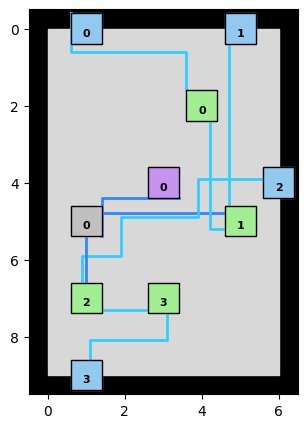

In [80]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectSlot+= ['T0']
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = BusTNames               
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [50]:
indiv['Econnect']

{0: [0], 1: [1], 2: [2], 3: [3]}

In [52]:
indiv

{'Clist': [0, 1, 2, 3],
 'CtoE': [0, 1, 2, 3],
 'Econnect': {0: [0], 1: [1], 2: [2], 3: [3]},
 'Elist': [0, 1, 2, 3],
 'Ecount': 4,
 'EtoP': [0, 0, 0, 0],
 'Pconnect': {0: [0, 1, 2, 3]},
 'Plist': [0],
 'Pcount': 1,
 'Ptype0': array(['Pc', 'Pc', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C0'], ['E1-C1'], ['E2-C2'], ['E3-C3']],
 'List_PtoE': [['P0-E0', 'P0-E1', 'P0-E2', 'P0-E3']],
 'Name': ['E0-C0',
  'E1-C1',
  'E2-C2',
  'E3-C3',
  'P0-E0',
  'P0-E1',
  'P0-E2',
  'P0-E3'],
 'ID': 0,
 'parent': [],
 'Name_txt': 'E0-C0,E1-C1,E2-C2,E3-C3,P0-E0,P0-E1,P0-E2,P0-E3',
 'Epoch': 0,
 'ListBusActif': [False],
 'Option': 'Bus',
 'Ptype': ['Pc', 'Pc', 'Pc', 'Pc'],
 'dist_Connect': {'E0-C0': 0.5,
  'E1-C1': 0.5,
  'E2-C2': 0.8,
  'E3-C3': 0.4,
  'P0-E0': 0.3,
  'P0-E1': 0.3,
  'P0-E2': 0.5,
  'P0-E3': 0.3},
 'dist': 359,
 'BusName': ['E0-C0',
  'E1-C1',
  'E2-C2',
  'E3-C3',
  'P0-E0',
  'P0-E1',
  'P0-E2',
  'P0-E3'],
 'BusDist': {'E0-C0': 0.5,
  'E1-C1': 0.5,
  'E2-C2': 0.8,
  'E3-C3': 0.4,


In [49]:
Elist

['E0', 'E1', 'E2', 'E3']

In [46]:
indiv['dist_Connect']

{'E0-C0': 0.5,
 'E1-C1': 0.5,
 'E2-C2': 0.8,
 'E3-C3': 0.4,
 'P0-E0': 0.3,
 'P0-E1': 0.3,
 'P0-E2': 0.5,
 'P0-E3': 0.3}

In [34]:
indiv['BusConnectDict']
Econnect = indiv['Econnect']
Ptype = indiv['Ptype']
GroupDict = algo.GroupDict
indiv['BusName']
indiv['dist_Connect']
indiv['BusDist']
Econnect

Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l }
Cconnect

Name = indiv['Name']
Name
distList = [algo.dist[line] for line in Name] 
distList
dist_Connect = dict(zip(Name,distList)) 
dist_Connect


[(0, [0]), (0, [1]), (0, [2]), (0, [3])]

['E0-C0', 'E1-C1', 'E2-C2', 'E3-C3', 'P0-E0', 'P0-E1', 'P0-E2', 'P0-E3']

{'E0-C0': 0.5,
 'E1-C1': 0.5,
 'E2-C2': 0.8,
 'E3-C3': 0.4,
 'P0-E0': 0.3,
 'P0-E1': 0.3,
 'P0-E2': 0.5,
 'P0-E3': 0.3}

{'E0-C0': 0.5,
 'E1-C1': 0.5,
 'E2-C2': 0.8,
 'E3-C3': 0.4,
 'P0-E0': 0.3,
 'P0-E1': 0.3,
 'P0-E2': 0.5,
 'P0-E3': 0.3}

{0: [0], 1: [1], 2: [2], 3: [3]}

{0: 0, 1: 1, 2: 2, 3: 3}

['E0-C0', 'E1-C1', 'E2-C2', 'E3-C3', 'P0-E0', 'P0-E1', 'P0-E2', 'P0-E3']

[0.5, 0.5, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3]

{'E0-C0': 0.5,
 'E1-C1': 0.5,
 'E2-C2': 0.8,
 'E3-C3': 0.4,
 'P0-E0': 0.3,
 'P0-E1': 0.3,
 'P0-E2': 0.5,
 'P0-E3': 0.3}

### plot

(10, 7)


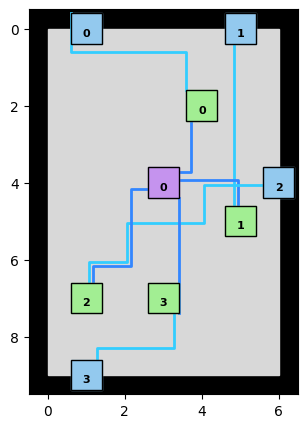

In [18]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = row.BusName                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

### test save

In [241]:
A = np.array(L, dtype=object)
A
np.isin(A, 'E1')

array([array(['E0', 'E1', 'E2'], dtype='<U2'),
       array(['E1', 'E0'], dtype='<U2'),
       array(['E2', 'E1', 'E0'], dtype='<U2'), array(['E3'], dtype='<U2')],
      dtype=object)

C:\Users\egos\anaconda3\envs\base2\lib\site-packages\numpy\lib\arraysetops.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([False, False, False, False])

In [256]:
pd.get_dummies(pd.Series(L).explode()).groupby(level=0).sum()

,E0,E1,E2,E3
0,1,1,1,0
1,1,1,0,0
2,1,1,1,0
3,0,0,0,1


In [158]:
nx.shortest_path_length(G, source='T0', target='E1', weight='dist')

0.6

In [160]:
list(nx.all_simple_paths(G, source='T0', target='E1'))

[['T0', 'E0', 'E1'],
 ['T0', 'E0', 'E2', 'E1'],
 ['T0', 'E1'],
 ['T0', 'E2', 'E0', 'E1'],
 ['T0', 'E2', 'E1']]

In [163]:
p = dict(nx.all_pairs_bellman_ford_path(G), weight='dist' )
p['T0']

{'T0': ['T0'], 'E0': ['T0', 'E0'], 'E1': ['T0', 'E1'], 'E2': ['T0', 'E2']}

In [157]:
print(nx.dijkstra_path(G, "T0", "E1"))

['T0', 'E1']


In [145]:
G = G0.subgraph(SlotName).copy()

In [146]:
%%timeit
p = nx.shortest_path(G, source='T0',target = "E1")


3.12 µs ± 62.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [147]:
dict(nx.all_pairs_shortest_path_length(G))

{'E0': {'E0': 0, 'T0': 1, 'E1': 1, 'E2': 1},
 'T0': {'T0': 0, 'E0': 1, 'E1': 1, 'E2': 1},
 'E1': {'E1': 0, 'E0': 1, 'T0': 1, 'E2': 1},
 'E2': {'E2': 0, 'E0': 1, 'T0': 1, 'E1': 1}}

In [150]:
G = nx.path_graph(5)
length = dict(nx.all_pairs_shortest_path_length(G))
for node in [0, 1, 2, 3, 4]:
    print(f"1 - {node}: {length[1][node]}")

1 - 0: 1
1 - 1: 0
1 - 2: 1
1 - 3: 2
1 - 4: 3


In [149]:
length = dict(nx.all_pairs_shortest_path_length(G))
for node in [0, 1, 2, 3, 4]:
    print(f"1 - {node}: {length[1][node]}")

KeyError: 1

In [ ]:
%%time
G = nx.from_pandas_edgelist(dfl, 's', 't', ['dist'])
n = "P0"
L = [n]
while G.size()>0 :
    adj  = [x[0] for x in G.adj[n].items()]
    dist = [x[1]['dist'] for x in G.adj[n].items()]
    G.remove_node(n)
    n = adj[np.array(dist).argmin()]
    L.append(n)
L

### save

# Test new debit error ol / new

In [69]:
file = {'SheetMapName' : 'map', 'uploaded_file' : "data.xlsx",'DistFactor' : 0.1}
# file = {'SheetMapName' : 'map', 'uploaded_file' : None, 'DistFactor' : 0.1}
# file = {'SheetMapName' : 'map bis', 'uploaded_file' : None, 'DistFactor' : 0.1}
algo = load_data_brut(file)
algo.ListBusPactif
algo.DebitCalculationNew = False
algo.Npc = 0
# algo.dfmap

Init algo namespace
['E0', 'E1', 'E2'] [('E0', 'E1'), ('E0', 'E2'), ('E1', 'E2')]
['confs', 'map', 'map bis', 'map s2', 'map (2)', 'map (3)']


[True, True]

In [56]:
algo.GroupDict = [1,1,0]
Name = "E0-C0,E0-C1,E0-C2,P0-E0"

In [70]:
algo.DebitCalculationNew = False
algo.Split = False
indiv  = Indiv_reverse(Name,algo)
indiv['PressionList'] , indiv['DebitList']
indiv['dist_Connect']
indiv['BusDist']
indiv['BusConnectDict']
# A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C

Indiv_reverse [0, 1, 2] [0, 0, 0] [0]
{'p': 0, 'e': 0, 'ClistG': [0, 1, 2], 'pt': 'Pa'} 0.000235 [0.3 0.5 0.8] [0.000235 0.000235 0.000235] [0.036 0.036 0.036] 9.400000000000001e-05


([4.52, 4.51, 4.5], [11.2, 11.19, 11.18])

{'E0-C0': 0.3, 'E0-C1': 0.5, 'E0-C2': 0.8, 'P0-E0': 0.4}

{'E0-C0': 0.3, 'E0-C1': 0.5, 'E0-C2': 0.8, 'P0-E0': 0.4}

[(0, [0])]

In [ ]:
# print(debitinput, coef_d_PtoE, d_EtoC_list, coef_d_EtoC, coef_C, coef_d_PtoE * d_PtoE)

In [67]:
indiv['Ptype']

['Pc']

In [71]:
algo.DebitCalculationNew = True
indiv  = Indiv_reverse(Name,algo)
indiv['PressionList'] , indiv['DebitList']
indiv['dist_Connect']
indiv['BusDist']
indiv['BusConnectDict']
# A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C

Indiv_reverse [0, 1, 2] [0, 0, 0] [0]
Pa
0.000764 [0.3 0.5 0.8] [0.000235 0.000235 0.000235] [0.036 0.036 0.036]


([3.85, 3.845, 3.838], [10.201, 10.194, 10.185])

{'E0-C0': 0.3, 'E0-C1': 0.5, 'E0-C2': 0.8, 'P0-E0': 0.4}

{'E0-C0': 0.3, 'E0-C1': 0.5, 'E0-C2': 0.8, 'P0-E0': 0.4}

[(0, [0])]

In [39]:
IndivLine = indiv_lines_conf(algo, indiv)
indiv['IndivLine'] = IndivLine
pd.DataFrame(IndivLine)
# print(json.dumps(d, sort_keys=True, indent=3))

,p,e,gr,pt,Gconnect
0,0,[0],"{1: [0, 1], 0: [2]}",Pa,"{0: {0: [2]}, 1: {0: [0, 1]}}"


In [40]:
indiv['dist_Connect']
indiv['BusDist']

{'E0-C0': 0.3, 'E0-C1': 0.5, 'E0-C2': 0.8, 'P0-E0': 0.4}

{'E0-C0': 0.3, 'E0-C1': 0.5, 'E0-C2': 0.8, 'P0-E0': 0.4}

In [43]:
res,d = New_debit(algo,indiv)
dfres = pd.DataFrame(res)
dfres
d

0.000764 [0.8] [0.000235] [0.036]
0.000764 [0.3 0.5] [0.000235 0.000235] [0.036 0.036]


,g,ClistDict,PtoElist,coef_PtoE,Qi,Pi,Alist
0,0,{0: [2]},[P0-E0],[9.4e-05],[11.214],[4.653],[[0.037]]
1,1,"{0: [0, 1]}",[P0-E0],[9.4e-05],"[10.797, 10.79]","[4.313, 4.308]","[[0.037, 0.037]]"


{'PressionList': [4.313, 4.308, 4.653],
 'DebitList': [10.797, 10.79, 11.214],
 'Esplit': {},
 'Debit': 32.8}

In [61]:
def debit(algo,indiv,debitinput, grouped = True, split = True):
    # print(d_EtoC_list,d_PtoE,Clist)
    pompe,ev,ClistG,pt = debitinput.values()
    d_EtoC_list = np.array([algo.dist['E{}-C{}'.format(ev,c)] for c in ClistG])
    d_PtoE      = indiv['dist_Connect']['P{}-E{}'.format(pompe,ev)]
    # print(d_EtoC_list,d_PtoE,ClistG)
    
    if not grouped : split = False
    PompeType = pt

    p = [-5.16e-04, -1.54e-02, 4.87]
    p = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]

    cE0 = 7.64e-04
    coef_E = 0 if split else cE0
    
    coef_C  = 0.036
    coef_C  = [algo.Nvals[i] for i in ClistG]
    coef_C  = np.array(coef_C)
    coef_d_EtoC  = 2.35e-04
    coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(ev,c)] for c in ClistG])
    # coef_d_PtoE = algo.duriteVal['P{}-E{}'.format(pompe,ev)] 
    coef_d_PtoE = indiv['duriteVal']['P{}-E{}'.format(pompe,ev)]     
    
    print(coef_d_PtoE, d_EtoC_list, coef_d_EtoC, coef_C, coef_d_PtoE * d_PtoE)
    A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
    # print(A)
    Z = ( A**-0.5).sum() if grouped else A**-0.5
    coef_E = cE0 if split else 0
    As = p[0] - (coef_d_PtoE * d_PtoE) - 1/(Z**2) - coef_E
    Bs = p[1]
    Cs = p[2]
    delta = (Bs**2) - (4 * As * Cs)
    Qt  = np.array((- Bs - delta**0.5)/(2*As))
    
    Pt = np.array(Qt**2 / Z**2)
    # print(Pt)
    # if (PompeType == 'Pc') &  (Pt >=  algo.Nozzlelimits[ClistG]).all():
    #     Pt = algo.Nozzlelimits[ClistG]*1.1 #* Pt/Pt

    a0 = p[0] * (Qt**2) + p[1] * Qt + p[2] - Pt
    Qi = (Pt / A)**0.5
    Pi = coef_C * (Qi**2)
    key = ['Qt','Pt','Qi','Pi']
    val = [Qt, Pt, Qi, Pi]
    val = [v.round(2) for v in val]
    
    return dict(zip(key,val))


debitinput = {'p': 0, 'e': 0, 'ClistG': [0, 1], 'pt': 'Pc'}
debit(algo,indiv,debitinput, grouped = True, split = True)

0.000235 [0.3 0.5] [0.000235 0.000235] [0.036 0.036] 9.400000000000001e-05


{'Qt': 32.55,
 'Pt': 9.56,
 'Qi': array([16.28, 16.27]),
 'Pi': array([9.54, 9.53])}

# Run

## Algo

In [35]:
file = {'SheetMapName' : 'map', 'uploaded_file' : "data.xlsx"}
# file = {'SheetMapName' : 'map', 'uploaded_file' : None, 'DistFactor' : 0.1}
file = {'SheetMapName' : 'map bis', 'uploaded_file' : None, 'DistFactor' : 0.1}
algo = load_data_brut(file)
# algo.dfmap

Init algo namespace
[('E0', 'E1'), ('E0', 'E2'), ('E0', 'E3'), ('E1', 'E2'), ('E1', 'E3'), ('E2', 'E3')]
['confs', 'map', 'map bis', 'map (2)', 'map (3)']


In [26]:
# generation de 10 indivs
df = indiv_init(algo, 10)

df.columns
indiv = algo.indivs[0]

Index(['Clist', 'CtoE', 'Econnect', 'Elist', 'Ecount', 'EtoP', 'Pconnect',
       'Plist', 'Pcount', 'Ptype0', 'List_EtoC', 'List_PtoE', 'Name', 'ID',
       'parent', 'Name_txt', 'Epoch', 'Option', 'Ptype', 'dist_Connect',
       'dist', 'BusName', 'BusDist', 'PtypeCo', 'PompesCo', 'PompeCount',
       'PompeSum', 'duriteVal', 'BusConnectDict', 'PressionList', 'DebitList',
       'Esplit', 'Debit', 'EvCount', 'EvSum', 'Masse', 'Cout', 'DetailsMasse',
       'DetailsCout', 'fitness', 'Alive'],
      dtype='object')

## Plot

(10, 7)


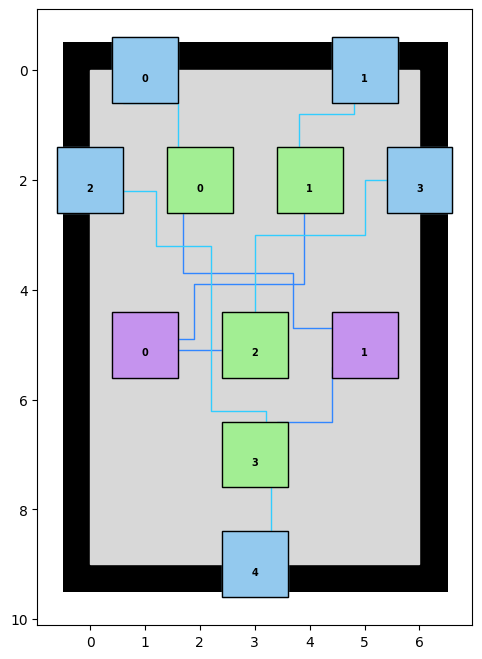

In [27]:
# Plot
row = df.iloc[0]
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = row.BusName                
fig = new_plot(algo, SelectLine, SelectSlot)

## ALL

(10, 7)


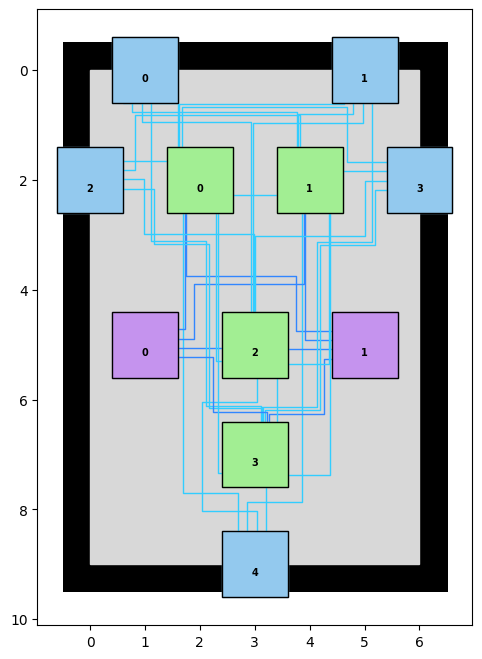

In [25]:
# Plot all
SelectLine = algo.DictLine.keys()
SelectSlot = algo.DictPos.keys()

fig = new_plot(algo, SelectLine, SelectSlot)

# NewBus

## func

In [ ]:
def indiv_lines_conf(algo, indiv):
    GroupDict = algo.GroupDict
    Econnect = indiv['Econnect']
    Ptype    = indiv['Ptype']
    Pconnect = indiv['Pconnect']
    GroupDict = algo.GroupDict
    Ptype = indiv['Ptype']
    Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l } # a bouger de place 

    Pline = indiv['BusConnectDict']
    IndivLine = []
    Gconnect = {}
    # loop sur BusConnectDict generer via func bus_connection qui doit prendre en compte le remove des PtoE 
    # list les mutiple connection au meme slot de pompe = remove ou autre solution 
    
    for i, (p, Elist) in enumerate(Pline):
        pt = Ptype[i]    
        gr = collections.defaultdict(list)
        Gconnect = {}

        # gr dict pour une line
        for e in Elist: 
            # on fait 1 le dict des group par {gr : c}  
            Clist = indiv['Econnect'][e]
            for c in Clist:
                gr[GroupDict[c]].append(c) 
        gr = dict(gr)
        print(p, Elist, gr, sorted(gr))

        # etape la plus bizarre on utile le nouveau Connect pour organiser les ev dans l'ordre et par groupe pour juste lister ensuite dans calcul debit
        for e in Elist:
            for n in sorted(gr): # pas sur quie le sorted serve a quelque chose 
                g = gr[n]
                d = collections.defaultdict(list)
                for c in g :
                    e = Cconnect[c]
                    d[e].append(c)
                Gconnect[n] = dict(d)       

        LineConf = dict(
            p = p,        
            e = Elist,
            gr = gr,
            pt = 'Pa',
            Gconnect = Gconnect
        )
        
        IndivLine.append(LineConf)
    return IndivLine

In [71]:
def New_debit(algo,indiv):
    res = []
    for line in IndivLine:
        pt = line['pt']
        p = line['p']
        Q0 = np.arange(0.1,80,0.1)
        for g , ClistDict in line['Gconnect'].items():
            g , ClistDict
            Elist = ClistDict.keys()
            # ClistDict = line['Gconnect']
            PtoElist  = ['P{}-E{}'.format(p,e) for e in Elist]
             # tres important puisque ordre de calucl a respecter 
            coef_PtoE = [DictLine[line]['duriteVal'] * indiv['BusDist'][line] for line in PtoElist]
            coef_PtoE = np.round(coef_PtoE,6)
            a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
            G = a * Q0**2 + b*Q0 +c
            Qx = 0

            Qlist, Alist = [] , []

            for i, (e,Clist) in enumerate(ClistDict.items()): # changer en list pour avoir l'ordre !!
    #             print(i, e,EClist)
                # calcul des coef comme avant 
                coef_C      = np.array([algo.Nvals[i] for i in Clist])
                d_EtoC      = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in Clist])
                coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(e,c)] for c in Clist])
                coef_E = 7.64e-04  

                # new si pas de capteur on a juste le coef de droite = 0 normalement 
                # le truc c'est quil faudra faire cette loop dans le cas de group ou le premier Ev dn'est pas activer 
                # donc prendre en compte pour le calcul de coef_PtoE
                G = G - coef_PtoE[i]*(Q0-Qx)**2
                G[G<0] = 0
                A = coef_E + d_EtoC * coef_d_EtoC + coef_C 
    #             print(coef_E ,d_EtoC , coef_d_EtoC ,coef_C,  A)
                Alist.append(A.round(3))
                # magie on tile la mtrice sur A step correspond au tableau excel etendu sur la droite
                Qlist.append(np.sqrt(G / A[:,np.newaxis]))
                Qi = np.vstack(Qlist)  # a essayer de passer en append coté numpy 
                Qx = Qi.sum(0)

            # le offset de -1 pour retrouver la plus proche valeur de Q0 -Qx facile 
            idx = np.searchsorted(Q0 - Qx, -1)
            # idx
            Qi = np.vstack(Qlist)[:,idx].round(3)
            Pi = (np.concatenate(Alist)* (Qi**2)).round(3)
            r = dict(
                g = g,
                ClistDict = ClistDict,
                PtoElist = PtoElist,
                coef_PtoE = coef_PtoE,
                Qi = Qi, 
                Pi = Pi,
                Alist = Alist,
            )
            res.append(r)
    return res

    

,g,ClistDict,PtoElist,coef_PtoE,Qi,Pi,Alist
0,1,"{0: [0, 2]}",[P0-E0],[9.4e-05],"[10.797, 10.8]","[4.313, 4.316]","[[0.037, 0.037]]"
1,0,{1: [1]},[P0-E1],[0.000141],[11.226],[4.663],[[0.037]]
2,1,{1: [3]},[P0-E1],[0.000141],[11.229],[4.665],[[0.037]]
3,0,{2: [4]},[P1-E2],[4.7e-05],[11.227],[4.664],[[0.037]]


In [ ]:
c1, c2, c3
Z = 1/(c1+c2+c3)
coeff = 1/Z

## load

In [20]:
file = {'SheetMapName' : 'map', 'uploaded_file' : "data.xlsx",'DistFactor' : 0.1}
# file = {'SheetMapName' : 'map', 'uploaded_file' : None, 'DistFactor' : 0.1}
# file = {'SheetMapName' : 'map bis', 'uploaded_file' : None, 'DistFactor' : 0.1}
algo = load_data_brut(file)
algo.ListBusPactif
algo.BusPactif = [True, True]
# algo.dfmap

Init algo namespace
['E0', 'E1', 'E2'] [('E0', 'E1'), ('E0', 'E2'), ('E1', 'E2')]
['confs', 'map', 'map bis', 'map s2', 'map (2)', 'map (3)']


[True, True]

In [19]:
algo.GroupDict = [1,1,0]
Name = "E1-C0,E1-C1,E1-C2,P1-E1"
indiv  = Indiv_reverse(Name,algo)

Indiv_reverse [0, 1, 2] [1, 1, 1] [1]
bus
{'PressionList': [4.16, 4.16, 4.5], 'DebitList': [10.74, 10.75, 11.18], 'Esplit': {1: [0, 1, 2]}, 'Debit': 32.7}
[1, 1, 0]
[(1, [1])]
[{'p': 1, 'e': [1], 'gr': {1: [0, 1], 0: [2]}, 'pt': 'Pa', 'Gconnect': {0: {1: [2]}, 1: {1: [0, 1]}}}]
[{'g': 0, 'ClistDict': {1: [2]}, 'PtoElist': ['P1-E1'], 'coef_PtoE': array([9.4e-05]), 'Qi': array([11.214]), 'Pi': array([4.653]), 'Alist': [array([0.037])]}, {'g': 1, 'ClistDict': {1: [0, 1]}, 'PtoElist': ['P1-E1'], 'coef_PtoE': array([9.4e-05]), 'Qi': array([10.79 , 10.797]), 'Pi': array([4.308, 4.313]), 'Alist': [array([0.037, 0.037])]}]
[4.308, 4.313, 4.653]


In [17]:
algo.BusActif

False

In [12]:
IndivLine = indiv_lines_conf(algo, indiv)

NameError: name 'indiv' is not defined

In [13]:
algo.Group = True
algo.GroupDict = [1,0,1,2,2]
algo.GroupDict = [1,0,1,1,0]
algo.GroupDict = [1,0,1,0,0]
algo.GroupDict = [0,1,2,3,4]
# algo.GroupDict = [1,1,1,1,1]
# algo.GroupDict = [1,0,1,2,2]

In [43]:
[algo.BusPactif[p] for p in indiv['Plist']]

[True, True]

In [14]:
# algo.BusActif = False
algo.BusActif  = True
algo.BusPactif = [True, True]
algo.Npc = 0
# indiv  = Indiv_reverse('E0-C0,E0-C1,E2-C2,P0-E0,P0-E1,P0-E2',algo)
indiv  = Indiv_reverse('E0-C0,E1-C1,E1-C3,E2-C4,E0-C2,P0-E0,P0-E1,P0-E2',algo)
indiv['Pconnect']
indiv['BusConnectDict']

Indiv_reverse [0, 1, 2, 3, 4] [0, 1, 0, 1, 2] [0, 0, 0]


{0: [0, 1, 2]}

[(0, [2, 0, 1])]

In [15]:
IndivLine = indiv_lines_conf(algo, indiv)
indiv['IndivLine'] = IndivLine
pd.DataFrame(IndivLine)
# print(json.dumps(d, sort_keys=True, indent=3))

,p,e,gr,pt,Gconnect
0,0,"[2, 0, 1]","{4: [4], 0: [0], 2: [2], 1: [1], 3: [3]}",Pa,"{0: {0: [0]}, 1: {1: [1]}, 2: {0: [2]}, 3: {1:..."


In [16]:
res,d = New_debit(algo,indiv)
dfres = pd.DataFrame(res)
dfres
d

,g,ClistDict,PtoElist,coef_PtoE,Qi,Pi,Alist
0,0,{0: [0]},[P0-E0],[9.4e-05],[11.232],[4.668],[[0.037]]
1,1,{1: [1]},[P0-E1],[4.7e-05],[11.238],[4.673],[[0.037]]
2,2,{0: [2]},[P0-E0],[9.4e-05],[11.235],[4.67],[[0.037]]
3,3,{1: [3]},[P0-E1],[4.7e-05],[11.241],[4.675],[[0.037]]
4,4,{2: [4]},[P0-E2],[4.7e-05],[11.227],[4.664],[[0.037]]


{'PressionList': [4.668, 4.673, 4.67, 4.675, 4.664],
 'DebitList': [11.232, 11.238, 11.235, 11.241, 11.227],
 'Esplit': {},
 'Debit': 10}

In [8]:
%%timeit
IndivLine = indiv_lines_conf(algo, indiv)
indiv['IndivLine'] = IndivLine
res,d = New_debit(algo,indiv)

139 µs ± 1.31 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [11]:
%%timeit
d = Calcul_Debit(algo ,indiv, True)

113 µs ± 744 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
indiv['DebitList']
indiv['PressionList']

[11.232, 11.238, 11.235, 11.241, 11.227]

[4.668, 4.673, 4.67, 4.675, 4.664]

In [82]:
indiv['DebitList']
indiv['PressionList']

[10.797, 10.772, 10.8, 10.775, 11.227]

[4.313, 4.293, 4.316, 4.296, 4.664]

In [72]:
Debit = {}
Pression = {}
for v in res:
    Clist = list(itertools.chain.from_iterable(v['ClistDict'].values()))
    Clist ,v['Qi']
    for i , c in enumerate(Clist):
        Debit[c]    = v['Qi'][i]
        Pression[c] = v['Pi'][i]

([0, 2], array([10.797, 10.8  ]))

([1, 3], array([10.772, 10.775]))

([4], array([11.227]))

In [76]:
list((dict(collections.OrderedDict(sorted(Debit.items()))).values()))

[10.797, 10.772, 10.8, 10.775, 11.227]

In [73]:
Debit

{0: 10.797, 2: 10.8, 1: 10.772, 3: 10.775, 4: 11.227}

In [71]:
Calcul_Debit(algo ,indiv, Split = algo.Split)

{'PressionList': [4.16, 4.14, 4.16, 4.14, 4.51],
 'DebitList': [10.75, 10.73, 10.75, 10.73, 11.2],
 'Esplit': {0: [0, 2], 1: [1, 3], 2: [4]},
 'Debit': 54.2}

In [55]:
list(itertools.chain.from_iterable(v['ClistDict'].values()))

[4, 0, 2, 1, 3]

In [ ]:
collections.OrderedDict(sorted(d.items()))

In [52]:
dfline = algo.dfline.copy()
dfline['s'] = dfline.ID.str.split('-').str[0]
dfline['t'] = dfline.ID.str.split('-').str[1]
dfline['Connect'] = dfline['s'].str[0] + dfline['t'].str[0]
dfline = dfline.set_index('ID')

In [53]:
dfline[dfline.Connect == 'EE']

,path,dist,duriteType,duriteVal,s,t,Connect
ID,,,,,,,
E1-E0,"[[2, 2], [2, 3], [2, 4]]",0.2,4,0.000235,E1,E0,EE
E2-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 3]]",0.4,4,0.000235,E2,E0,EE
E3-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2...",0.6,4,0.000235,E3,E0,EE
E2-E1,"[[2, 4], [3, 4], [4, 4], [5, 4], [5, 3]]",0.4,4,0.000235,E2,E1,EE
E3-E1,"[[2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4...",0.6,4,0.000235,E3,E1,EE
E3-E2,"[[5, 3], [6, 3], [7, 3]]",0.2,4,0.000235,E3,E2,EE


In [17]:
lineDict= dfline.to_dict()

In [29]:
DictLine = algo.DictLine
DictLine

{'E0-C0': {'path': array([[2, 2],
         [1, 2],
         [1, 1],
         [0, 1]]),
  'dist': 0.3,
  'duriteType': 4,
  'duriteVal': 0.000235},
 'E0-C1': {'path': array([[2, 2],
         [1, 2],
         [1, 3],
         [1, 4],
         [1, 5],
         [0, 5]]),
  'dist': 0.5,
  'duriteType': 4,
  'duriteVal': 0.000235},
 'E0-C2': {'path': array([[2, 2],
         [2, 1],
         [2, 0]]),
  'dist': 0.2,
  'duriteType': 4,
  'duriteVal': 0.000235},
 'E0-C3': {'path': array([[2, 2],
         [1, 2],
         [1, 3],
         [1, 4],
         [1, 5],
         [2, 5],
         [2, 6]]),
  'dist': 0.6,
  'duriteType': 4,
  'duriteVal': 0.000235},
 'E0-C4': {'path': array([[2, 2],
         [3, 2],
         [4, 2],
         [5, 2],
         [6, 2],
         [7, 2],
         [8, 2],
         [8, 3],
         [9, 3]]),
  'dist': 0.8,
  'duriteType': 4,
  'duriteVal': 0.000235},
 'P0-E0': {'path': array([[2, 2],
         [3, 2],
         [4, 2],
         [5, 2],
         [5, 1]]),
  'dist'

In [59]:
indiv

{'Clist': [0, 1, 2, 3, 4],
 'CtoE': [0, 1, 0, 1, 2],
 'Econnect': {0: [0, 2], 1: [1, 3], 2: [4]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [0, 0, 1],
 'Pconnect': {0: [0, 1], 1: [2]},
 'Plist': [0, 1],
 'Pcount': 2,
 'Ptype0': array(['Pa', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C0', 'E0-C2'], ['E1-C1', 'E1-C3'], ['E2-C4']],
 'List_PtoE': [['P0-E0', 'P0-E1'], ['P1-E2']],
 'Name': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'P0-E0',
  'P0-E1',
  'P1-E2'],
 'ID': 2,
 'parent': [],
 'Name_txt': 'E0-C0,E0-C2,E1-C1,E1-C3,E2-C4,P0-E0,P0-E1,P1-E2',
 'Epoch': 0,
 'ListBusActif': [False, False, False],
 'Option': 'Bus',
 'Ptype': ['Pa', 'Pa', 'Pa'],
 'dist_Connect': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.4,
  'P0-E1': 0.6,
  'P1-E2': 0.2},
 'dist': 280,
 'BusName': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'P0-E0',
  'P0-E1',
  'P1-E2'],
 'BusDist': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 

### plot

(10, 7)


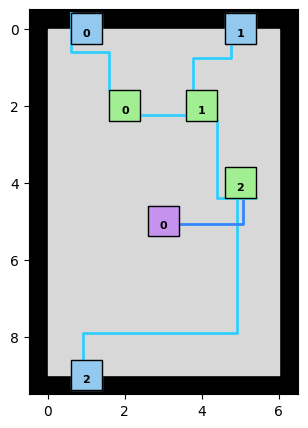

In [193]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = row.BusName                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

## df refacto

In [94]:
dfslot = pd.DataFrame(algo.DictPos).T.sort_index()
dfslot.columns = ('y','x')
dfslot.T

,C0,C1,C2,C3,C4,E0,E1,E2,E3,P0,P1
y,0,0,2,2,9,2,2,5,7,5,5
x,1,5,0,6,3,2,4,3,3,1,5


In [29]:
dfline = algo.dfline.copy()
dfline['s'] = dfline.ID.str.split('-').str[0]
dfline['t'] = dfline.ID.str.split('-').str[1]
dfline

,ID,path,dist,duriteType,duriteVal,s,t
0,E0-C0,"[[2, 2], [1, 2], [1, 1], [0, 1]]",0.3,4,0.000235,E0,C0
1,E0-C1,"[[2, 2], [1, 2], [1, 3], [1, 4], [1, 5], [0, 5]]",0.5,4,0.000235,E0,C1
2,E0-C2,"[[2, 2], [2, 1], [2, 0]]",0.2,4,0.000235,E0,C2
3,E0-C3,"[[2, 2], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5...",0.6,4,0.000235,E0,C3
4,E0-C4,"[[2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2...",0.8,4,0.000235,E0,C4
5,P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E0
6,P1-E0,"[[2, 2], [3, 2], [4, 2], [4, 3], [4, 4], [5, 4...",0.6,4,0.000235,P1,E0
7,E1-C0,"[[2, 4], [1, 4], [1, 3], [1, 2], [1, 1], [0, 1]]",0.5,4,0.000235,E1,C0
8,E1-C1,"[[2, 4], [1, 4], [1, 5], [0, 5]]",0.3,4,0.000235,E1,C1
9,E1-C2,"[[2, 4], [1, 4], [1, 3], [1, 2], [1, 1], [2, 1...",0.6,4,0.000235,E1,C2


In [100]:
Econnect = indiv['Econnect']
Ptype = indiv['Ptype']
GroupDict = algo.GroupDict
indiv['BusName']
Econnect
GroupDict

['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'P0-E0', 'E1-E0', 'P0-E2']

{0: [0, 2], 1: [1, 3], 2: [4]}

[1, 0, 1, 1, 0]

{'Clist': [0, 1, 2, 3, 4],
 'CtoE': [0, 1, 0, 1, 2],
 'Econnect': {0: [0, 2], 1: [1, 3], 2: [4]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [0, 0, 0],
 'Pconnect': {0: [0, 1]},
 'Plist': [0],
 'Pcount': 1,
 'Ptype0': array(['Pa', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C0', 'E0-C2'], ['E1-C1', 'E1-C3'], ['E2-C4']],
 'List_PtoE': [['P0-E0', 'P0-E1', 'P0-E2']],
 'Name': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'P0-E0',
  'P0-E1',
  'P0-E2'],
 'ID': 0,
 'parent': [],
 'Name_txt': 'E0-C0,E0-C2,E1-C1,E1-C3,E2-C4,P0-E0,P0-E1,P0-E2',
 'Epoch': 0,
 'Option': 'Bus',
 'Ptype': ['Pa', 'Pa', 'Pa'],
 'dist_Connect': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.4,
  'P0-E1': 0.6000000000000001,
  'P0-E2': 0.2},
 'dist': 240,
 'BusName': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'P0-E0',
  'E1-E0',
  'P0-E2'],
 'BusDist': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.4,
 

In [103]:
dfl = dfline[dfline.ID.isin(indiv['Name'])]
dfl

,ID,path,dist,duriteType,duriteVal,s,t
0,E0-C0,"[[2, 2], [1, 2], [1, 1], [0, 1]]",0.3,4,0.000235,E0,C0
2,E0-C2,"[[2, 2], [2, 1], [2, 0]]",0.2,4,0.000235,E0,C2
5,P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E0
8,E1-C1,"[[2, 4], [1, 4], [1, 5], [0, 5]]",0.3,4,0.000235,E1,C1
10,E1-C3,"[[2, 4], [2, 5], [2, 6]]",0.2,4,0.000235,E1,C3
12,P0-E1,"[[2, 4], [3, 4], [4, 4], [4, 3], [4, 2], [5, 2...",0.6,4,0.000235,P0,E1
18,E2-C4,"[[5, 3], [6, 3], [6, 2], [7, 2], [8, 2], [8, 3...",0.6,4,0.000235,E2,C4
19,P0-E2,"[[5, 3], [5, 2], [5, 1]]",0.2,4,0.000235,P0,E2


## New busconnection

In [29]:
dfline[dfline.Connect=='EE']

,ID,path,dist,duriteType,s,t,Connect,duriteVal
24,E1-E0,"[[2, 4], [3, 4], [4, 4], [5, 4], [5, 5]]",0.4,4,E1,E0,EE,0.000235
25,E2-E0,"[[2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [6, 3...",0.8,4,E2,E0,EE,0.000235
26,E3-E0,"[[2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4...",0.6,4,E3,E0,EE,0.000235
27,E2-E1,"[[5, 5], [6, 5], [6, 4], [6, 3], [6, 2], [7, 2...",0.6,4,E2,E1,EE,0.000235
28,E3-E1,"[[5, 5], [6, 5], [7, 5], [7, 4], [7, 3]]",0.4,4,E3,E1,EE,0.000235
29,E3-E2,"[[7, 1], [7, 2], [7, 3]]",0.2,4,E3,E2,EE,0.000235


In [ ]:
dfline

In [95]:
e = px[0].argmin()
ex = x[x.index.str.contains('E')].values
ex.drop()
while len(ex) > 0:
    e = ex[e]

2

In [79]:
pos = np.where(x == np.min(x)
pos = pos[0][0], pos[1][0]
pos

(0, 0)

In [109]:
G=nx.from_pandas_edgelist(dfline, 's', 't', ['dist'])

In [150]:
ListMask = ['P0', 'E0','E1','E2','E3']
mask = dfline.s.isin(ListMask) & dfline.t.isin(ListMask)
dfl = dfline[mask]

In [168]:
# New_dist_Connect = copy.deepcopy(dist_Connect)
BusName = copy.deepcopy(indiv['Name'])
Pconnect = indiv['Pconnect']

dfx0 = algo.dfline.copy()
dfx0['a'] = dfx0.ID.str.split('-').str[0]
dfx0['b'] = dfx0.ID.str.split('-').str[1]

NameListNew  = []
DictMapName = {}
BusConnectDict = []

In [155]:
Pconnect

{0: [0, 1, 2]}

In [165]:
G.nodes

NodeView(('E1',))

In [171]:
%%timeit
G = nx.from_pandas_edgelist(dfl, 's', 't', ['dist'])

19.6 µs ± 51.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [172]:
G = nx.from_pandas_edgelist(dfl, 's', 't', ['dist'])
G.size(weight="dist")

4.0

In [173]:
Elist
G.subgraph()

[0, 0, 2]

TypeError: Graph.subgraph() missing 1 required positional argument: 'nodes'

In [175]:
G['P0']

ItemsView(AtlasView({'E0': {'dist': 0.4}, 'E1': {'dist': 0.6}, 'E2': {'dist': 0.2}, 'E3': {'dist': 0.4}}))

In [206]:
%%time
G = nx.from_pandas_edgelist(dfl, 's', 't', ['dist'])
n = "P0"
L = [n]
while G.size()>0 :
    adj  = [x[0] for x in G.adj[n].items()]
    dist = [x[1]['dist'] for x in G.adj[n].items()]
    G.remove_node(n)
    n = adj[np.array(dist).argmin()]
    L.append(n)
L

ValueError: attempt to get argmin of an empty sequence

In [114]:
%%timeit
nx.single_source_shortest_path_length(G ,source='P0')

2.54 µs ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [189]:
G = nx.from_pandas_edgelist(dfline, 's', 't', ['dist'])
list(G.edges.data(data = True))

[('E0', 'C0', {'dist': 0.3}),
 ('E0', 'C1', {'dist': 0.5}),
 ('E0', 'C2', {'dist': 0.2}),
 ('E0', 'C3', {'dist': 0.6}),
 ('E0', 'C4', {'dist': 0.8}),
 ('E0', 'P0', {'dist': 0.4}),
 ('E0', 'P1', {'dist': 0.6}),
 ('E0', 'E1', {'dist': 0.2}),
 ('E0', 'E2', {'dist': 0.4}),
 ('E0', 'E3', {'dist': 0.6}),
 ('C0', 'E1', {'dist': 0.5}),
 ('C0', 'E2', {'dist': 0.7}),
 ('C0', 'E3', {'dist': 0.9}),
 ('C1', 'E1', {'dist': 0.3}),
 ('C1', 'E2', {'dist': 0.7}),
 ('C1', 'E3', {'dist': 0.9}),
 ('C2', 'E1', {'dist': 0.6}),
 ('C2', 'E2', {'dist': 0.6}),
 ('C2', 'E3', {'dist': 0.8}),
 ('C3', 'E1', {'dist': 0.2}),
 ('C3', 'E2', {'dist': 0.6}),
 ('C3', 'E3', {'dist': 0.8}),
 ('C4', 'E1', {'dist': 0.8}),
 ('C4', 'E2', {'dist': 0.6}),
 ('C4', 'E3', {'dist': 0.2}),
 ('P0', 'E1', {'dist': 0.6}),
 ('P0', 'E2', {'dist': 0.2}),
 ('P0', 'E3', {'dist': 0.4}),
 ('P1', 'E1', {'dist': 0.4}),
 ('P1', 'E2', {'dist': 0.2}),
 ('P1', 'E3', {'dist': 0.4}),
 ('E1', 'E2', {'dist': 0.4}),
 ('E1', 'E3', {'dist': 0.6}),
 ('E2', 'E

In [188]:
indiv['Name']

['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'P0-E0', 'P0-E1', 'P0-E2']

In [192]:
dfslot = pd.DataFrame(algo.DictPos).T
dfslot.columns = ('y','x')
node_attr = dfslot.to_dict('index')
nx.set_node_attributes(G, node_attr)

In [191]:
H = G.
G.remove_nodes_from(list(nx.isolates(G)))

NameError: name 'dfslot' is not defined

In [207]:
dfl = dfline[dfline.ID.isin(indiv['Name'])]
dfl
G = nx.from_pandas_edgelist(dfl, 's', 't', ['dist'])

,ID,path,dist,duriteType,duriteVal,s,t,Connect
0,E0-C0,"[[2, 2], [1, 2], [1, 1], [0, 1]]",0.3,4,0.000235,E0,C0,EC
2,E0-C2,"[[2, 2], [2, 1], [2, 0]]",0.2,4,0.000235,E0,C2,EC
5,P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E0,PE
8,E1-C1,"[[2, 4], [1, 4], [1, 5], [0, 5]]",0.3,4,0.000235,E1,C1,EC
10,E1-C3,"[[2, 4], [2, 5], [2, 6]]",0.2,4,0.000235,E1,C3,EC
12,P0-E1,"[[2, 4], [3, 4], [4, 4], [4, 3], [4, 2], [5, 2...",0.6,4,0.000235,P0,E1,PE
18,E2-C4,"[[5, 3], [6, 3], [6, 2], [7, 2], [8, 2], [8, 3...",0.6,4,0.000235,E2,C4,EC
19,P0-E2,"[[5, 3], [5, 2], [5, 1]]",0.2,4,0.000235,P0,E2,PE


In [210]:
H = G.subgraph(['P0','E2','C4'])
H.size(weight="dist")

0.8

In [204]:
NodesList = pd.concat([dfline['s'] , dfline['t']]).unique()

In [211]:
indiv

{'Clist': [0, 1, 2, 3, 4],
 'CtoE': [0, 1, 0, 1, 2],
 'Econnect': {0: [0, 2], 1: [1, 3], 2: [4]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [0, 0, 0],
 'Pconnect': {0: [0, 1, 2]},
 'Plist': [0],
 'Pcount': 1,
 'Ptype0': array(['Pa', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C0', 'E0-C2'], ['E1-C1', 'E1-C3'], ['E2-C4']],
 'List_PtoE': [['P0-E0', 'P0-E1', 'P0-E2']],
 'Name': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'P0-E0',
  'P0-E1',
  'P0-E2'],
 'ID': 2,
 'parent': [],
 'Name_txt': 'E0-C0,E0-C2,E1-C1,E1-C3,E2-C4,P0-E0,P0-E1,P0-E2',
 'Epoch': 0,
 'Option': 'Bus',
 'Ptype': ['Pa', 'Pa', 'Pa'],
 'dist_Connect': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.6000000000000001,
  'P0-E1': 0.8,
  'P0-E2': 0.2},
 'dist': 240,
 'BusName': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'E2-E0',
  'E1-E0',
  'P0-E2'],
 'BusDist': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.4

In [348]:
%%time
G0 = nx.from_pandas_edgelist(dfline, 's', 't', ['dist'])
for i, (p,Elist) in enumerate(Pconnect.items()): 
    pass

p = 'P{}'.format(p)
ElistName = ['E{}'.format(e) for e in Elist]
SlotName = [p] + ElistName
SlotName
G = G0.subgraph(SlotName).copy()

dfl = dfline[dfline.index.isin(indiv['Name'])]
G = G0.subgraph(SlotName).copy()
# dfl = dfline[dfline.ID.isin(indiv['Name'])]
# G = nx.from_pandas_edgelist(dfl, 's', 't', ['dist'])
n = p
L = [n]
path = []
while G.size()>0 :
    
    NodesAdj  = [x[0] for x in G.adj[n].items()]
    NodesDist = [x[1]['dist'] for x in G.adj[n].items()]
    ns = n
    G.remove_node(n)
    n = NodesAdj[np.array(NodesDist).argmin()]
    L.append(n)
    path.append('{}-{}'.format(ns,n))
L
path

CPU times: total: 0 ns
Wall time: 1 ms


['P0-E2', 'E2-E0', 'E0-E1']

## test conf

In [18]:
algo.dfline

,ID,path,dist,duriteType,duriteVal
0,E0-C0,"[[2, 2], [1, 2], [1, 1], [0, 1]]",0.3,4,0.000235
1,E0-C1,"[[2, 2], [1, 2], [1, 3], [1, 4], [1, 5], [0, 5]]",0.5,4,0.000235
2,E0-C2,"[[2, 2], [2, 1], [2, 0]]",0.2,4,0.000235
3,E0-C3,"[[2, 2], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5...",0.6,4,0.000235
4,E0-C4,"[[2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2...",0.8,4,0.000235
5,P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235
6,P1-E0,"[[2, 2], [3, 2], [4, 2], [4, 3], [4, 4], [5, 4...",0.6,4,0.000235
7,E1-C0,"[[2, 4], [1, 4], [1, 3], [1, 2], [1, 1], [0, 1]]",0.5,4,0.000235
8,E1-C1,"[[2, 4], [1, 4], [1, 5], [0, 5]]",0.3,4,0.000235
9,E1-C2,"[[2, 4], [1, 4], [1, 3], [1, 2], [1, 1], [2, 1...",0.6,4,0.000235


In [21]:
pd.Series(indiv)

Clist                                               [0, 1, 2, 3, 4]
CtoE                                                [0, 1, 0, 1, 2]
Econnect                             {0: [0, 2], 1: [1, 3], 2: [4]}
Elist                                                     [0, 1, 2]
Ecount                                                            3
EtoP                                                      [0, 0, 0]
Pconnect                                                {0: [0, 1]}
Plist                                                           [0]
Pcount                                                            1
Ptype0                                                 [Pa, Pa, Pa]
List_EtoC                 [[E0-C0, E0-C2], [E1-C1, E1-C3], [E2-C4]]
List_PtoE                                   [[P0-E0, P0-E1, P0-E2]]
Name              [E0-C0, E0-C2, E1-C1, E1-C3, E2-C4, P0-E0, P0-...
ID                                                                0
parent                                          

In [8]:
Econnect = indiv['Econnect']
Ptype = indiv['Ptype']
GroupDict = algo.GroupDict
indiv['BusName']
Econnect

Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l }
Cconnect

Name = indiv['Name']
Name
distList = [algo.dist[line] for line in Name] 
distList
dist_Connect = dict(zip(Name,distList)) 
dist_Connect
Bus_Connection(algo, indiv, dist_Connect)

['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'E2-E0', 'E1-E0', 'P0-E2']

{0: [0, 2], 1: [1, 3], 2: [4]}

{0: 0, 2: 0, 1: 1, 3: 1, 4: 2}

['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'P0-E0', 'P0-E1', 'P0-E2']

[0.3, 0.2, 0.3, 0.2, 0.6, 0.4, 0.6, 0.2]

{'E0-C0': 0.3,
 'E0-C2': 0.2,
 'E1-C1': 0.3,
 'E1-C3': 0.2,
 'E2-C4': 0.6,
 'P0-E0': 0.4,
 'P0-E1': 0.6,
 'P0-E2': 0.2}

0 (0, [0, 1, 2])
bus P0 0 [0, 1, 2] ['P0-E2', 'P0-E0', 'P0-E1'] ['P0', 'E2', 'E0', 'E1'] ['P0-E2', 'E2-E0', 'E1-E0'] [0.2, 0.4, 0.2] [0.2 0.6 0.8] ['P0-E2', 'P0-E0', 'P0-E1']


({'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.6000000000000001,
  'P0-E1': 0.8,
  'P0-E2': 0.2},
 ['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'E2-E0', 'E1-E0', 'P0-E2'],
 [{'p': 0, 'e': [2, 0, 1]}])

In [ ]:
Bus_Connection_v2(algo, indiv, dist_Connect)

In [9]:
gr = collections.defaultdict(list)
# on fait 1 le dict des group par {gr : c}  
for e, clist in Econnect.items():
    for c in clist:
        gr[GroupDict[c]].append(c) 
gr
DictX = {}
for g, clist in gr.items(): # pas sur quie le sorted serve a quelque chose 
        d = collections.defaultdict(list)
        for c in clist :
            e = Cconnect[c]
            if e in [0,1,2]:
                d[e].append(c)
                DictX[g] = dict(d) 
DictX  

defaultdict(list, {1: [0, 2, 3], 0: [1, 4]})

{1: {0: [0, 2], 1: [3]}, 0: {1: [1], 2: [4]}}

In [25]:
Econnect
GroupDict
indiv['BusConnectDict']

{0: [0, 2], 1: [1, 3], 2: [4]}

[1, 0, 1, 1, 0]

[{'p': 0, 'e': [0, 1]}]

In [134]:
set(GroupDict)

{0, 1}

In [135]:
dict.fromkeys(GroupDict)

{1: None, 0: None}

In [110]:
np.unique([1,0,1,2,2],return_index=True,
    return_inverse=True,
    return_counts=True,)

(array([0, 1, 2]),
 array([1, 0, 3], dtype=int64),
 array([1, 0, 1, 2, 2], dtype=int64),
 array([1, 2, 2], dtype=int64))

In [104]:
np.where(np.array(GroupDict) == 1)[0]

array([0, 2, 3], dtype=int64)

In [23]:
dx = {}
Econnect
gr = {}
for n in [0,1]:
    d = collections.defaultdict(list)
    glist = np.where(np.array(GroupDict) == n)[0]
    for e, clist in Econnect.items():
        for c in clist :
            if c in glist:
                d[e].append(c)
#     print(g , dict(d))
    dx[n] = dict(d)
    gr[n] = list(glist)
dx
gr

{0: [0, 2], 1: [1, 3], 2: [4]}

{0: {1: [1], 2: [4]}, 1: {0: [0, 2], 1: [3]}}

{0: [1, 4], 1: [0, 2, 3]}

In [96]:
Cconnect

{0: 0, 2: 0, 1: 1, 3: 1, 4: 2}

## Conf

In [31]:
dfl = dfline[dfline.index.isin(indiv['Name'])]
dfl

,path,dist,duriteType,duriteVal,s,t,Connect
ID,,,,,,,
E0-C0,"[[2, 2], [1, 2], [1, 1], [0, 1]]",0.3,4,0.000235,E0,C0,EC
E0-C2,"[[2, 2], [2, 1], [2, 0]]",0.2,4,0.000235,E0,C2,EC
P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E0,PE
E1-C1,"[[2, 4], [1, 4], [1, 5], [0, 5]]",0.3,4,0.000235,E1,C1,EC
E1-C3,"[[2, 4], [2, 5], [2, 6]]",0.2,4,0.000235,E1,C3,EC
P0-E1,"[[2, 4], [3, 4], [4, 4], [4, 3], [4, 2], [5, 2...",0.6,4,0.000235,P0,E1,PE
E2-C4,"[[5, 3], [6, 3], [6, 2], [7, 2], [8, 2], [8, 3...",0.6,4,0.000235,E2,C4,EC
P1-E2,"[[5, 3], [5, 4], [5, 5]]",0.2,4,0.000235,P1,E2,PE


In [51]:
Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l }
Cconnect

{0: 0, 2: 0, 1: 1, 3: 1, 4: 2}

In [32]:
Econnect = indiv['Econnect']
Ptype    = indiv['Ptype']
Pconnect = indiv['Pconnect']
GroupDict = algo.GroupDict
Ptype = indiv['Ptype']
Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l }

print("BusName",indiv['BusName'])
print("Econnect" , Econnect)
print("Pconnect" , Pconnect)
print("Ptype" , list(Ptype))
print("Cconnect"  , Cconnect)
print("GroupDict" , GroupDict)
print("BusConnectDict" , indiv['BusConnectDict'])
Name = indiv['Name']
print("Name",Name)
distList = [algo.dist[line] for line in Name] 
# distList
dist_Connect = dict(zip(Name,distList)) 
print("dist_Connect", indiv['dist_Connect'])
print("BusDist", indiv['BusDist'])
print("BusConnectDict",indiv['BusConnectDict'])
Pline = copy.deepcopy(Pconnect)

BusName ['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'P0-E0', 'E1-E0', 'P1-E2']
Econnect {0: [0, 2], 1: [1, 3], 2: [4]}
Pconnect {0: [0, 1], 1: [2]}
Ptype ['Pa', 'Pa', 'Pa']
Cconnect {0: 0, 2: 0, 1: 1, 3: 1, 4: 2}
GroupDict [1, 0, 1, 1, 0]
BusConnectDict [(0, [0, 1]), (1, [2])]
Name ['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'P0-E0', 'P0-E1', 'P1-E2']
dist_Connect {'E0-C0': 0.3, 'E0-C2': 0.2, 'E1-C1': 0.3, 'E1-C3': 0.2, 'E2-C4': 0.6, 'P0-E0': 0.4, 'P0-E1': 0.6000000000000001, 'P1-E2': 0.2}
BusDist {'E0-C0': 0.3, 'E0-C2': 0.2, 'E1-C1': 0.3, 'E1-C3': 0.2, 'E2-C4': 0.6, 'P0-E0': 0.4, 'P0-E1': 0.2, 'P1-E2': 0.2}
BusConnectDict [(0, [0, 1]), (1, [2])]


In [36]:
Pline = copy.deepcopy(indiv['BusConnectDict'])
Pline

[(0, [0, 1]), (1, [2])]

In [78]:
Pline = []
for p, elist in Pconnect.items():
    for e in elist:
        line =  (p, [e])
        Pline.append(line)
Pline

[(0, [0]), (0, [1]), (1, [2])]

In [65]:
indiv['BusConnectDict']

[(0, [0]), (0, [1]), (1, [2])]

In [69]:
def indiv_lines_conf(algo, indiv):
    GroupDict = algo.GroupDict
    Econnect = indiv['Econnect']
    Ptype    = indiv['Ptype']
    Pconnect = indiv['Pconnect']
    GroupDict = algo.GroupDict
    Ptype = indiv['Ptype']
    Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l } # a bouger de place 

    Pline = indiv['BusConnectDict']
    IndivLine = []
    Gconnect = {}
    # loop sur BusConnectDict generer via func bus_connection qui doit prendre en compte le remove des PtoE 
    # list les mutiple connection au meme slot de pompe = remove ou autre solution 
    
    for i, (p, Elist) in enumerate(Pline):
        pt = Ptype[i]    
        gr = collections.defaultdict(list)
        Gconnect = {}

        # gr dict pour une line
        for e in Elist: 
            # on fait 1 le dict des group par {gr : c}  
            Clist = indiv['Econnect'][e]
            for c in Clist:
                gr[GroupDict[c]].append(c) 
        gr = dict(gr)
        print(p, Elist, gr, sorted(gr))

        # etape la plus bizarre on utile le nouveau Connect pour organiser les ev dans l'ordre et par groupe pour juste lister ensuite dans calcul debit
        for e in Elist:
            for n in sorted(gr): # pas sur quie le sorted serve a quelque chose 
                g = gr[n]
                d = collections.defaultdict(list)
                for c in g :
                    e = Cconnect[c]
                    d[e].append(c)
                Gconnect[n] = dict(d)       

        LineConf = dict(
            p = p,        
            e = Elist,
            gr = gr,
            pt = 'Pa',
            Gconnect = Gconnect
        )
        
        IndivLine.append(LineConf)
    return IndivLine

IndivLine = indiv_lines_conf(algo, indiv)
pd.DataFrame(IndivLine)
# print(json.dumps(d, sort_keys=True, indent=3))

0 [0] {1: [0, 2]} [1]
0 [1] {0: [1], 1: [3]} [0, 1]
1 [2] {0: [4]} [0]


,p,e,gr,pt,Gconnect
0,0,[0],"{1: [0, 2]}",Pa,"{1: {0: [0, 2]}}"
1,0,[1],"{0: [1], 1: [3]}",Pa,"{0: {1: [1]}, 1: {1: [3]}}"
2,1,[2],{0: [4]},Pa,{0: {2: [4]}}


### s

In [50]:
GroupDict = algo.GroupDict
Econnect = indiv['Econnect']

IndivLine = []
Gconnect = {}
# loop sur BusConnectDict generer via func bus_connection qui doit prendre en compte le remove des PtoE 
# list les mutiple connection au meme slot de pompe = remove ou autre solution 
for p, Elist in Pline.items():
    pt = 'Pa' 
    gr = collections.defaultdict(list)

    # on fait 1 le dict des group par {gr : c}  
    for e in Elist:
        for c in indiv['Econnect'][e]:
            gr[GroupDict[c]].append(c) 
    gr = dict(gr)
    print(p, Elist, gr, sorted(gr))

    # etape la plus bizarre on utile le nouveau Connect pour organiser les ev dans l'ordre et par groupe pour juste lister ensuite dans calcul debit
    for n in sorted(gr): # pas sur quie le sorted serve a quelque chose 
        g = gr[n]
        d = collections.defaultdict(list)
        for c in g :
            e = Cconnect[c]
            d[e].append(c)
        Gconnect[n] = dict(d)       

    conf = dict(
        p = p,
        e = Elist,
        gr = gr,
        pt = 'Pa',
        Gconncect = Gconnect
    )
    IndivLine.append(conf)

pd.DataFrame(IndivLine)
# print(json.dumps(d, sort_keys=True, indent=3))

0 [0, 1] {0: [0, 2, 1, 3]} [0]
1 [2] {0: [4]} [0]


,p,e,gr,pt,Gconncect
0,0,"[0, 1]","{0: [0, 2, 1, 3]}",Pa,{0: {2: [4]}}
1,1,[2],{0: [4]},Pa,{0: {2: [4]}}


## debit

In [132]:
a = (0,1,2)
a = ['P0','E0','E1']

In [134]:
list(itertools.pairwise(a))

[('P0', 'E0'), ('E0', 'E1')]

In [22]:
for line in IndivLine:
    for n , ClistDict in line['Gconnect'].items():
        print(n, ClistDict)

0 {1: [1]}
1 {0: [0, 2], 1: [3]}
0 {2: [4]}


In [54]:
ClistDict.keys()

dict_keys([2])

In [92]:
PtoElist

['P0-E2']

In [40]:
indiv['dist_Connect']
indiv['BusDist']

{'E0-C0': 0.3,
 'E0-C2': 0.2,
 'E1-C1': 0.3,
 'E1-C3': 0.2,
 'E2-C4': 0.6,
 'P0-E0': 0.4,
 'P0-E1': 0.6000000000000001,
 'P1-E2': 0.2}

{'E0-C0': 0.3,
 'E0-C2': 0.2,
 'E1-C1': 0.3,
 'E1-C3': 0.2,
 'E2-C4': 0.6,
 'P0-E0': 0.4,
 'P0-E1': 0.2,
 'P1-E2': 0.2}

In [41]:
dfline

,path,dist,duriteType,duriteVal,s,t,Connect
ID,,,,,,,
E0-C0,"[[2, 2], [1, 2], [1, 1], [0, 1]]",0.3,4,0.000235,E0,C0,EC
E0-C1,"[[2, 2], [1, 2], [1, 3], [1, 4], [1, 5], [0, 5]]",0.5,4,0.000235,E0,C1,EC
E0-C2,"[[2, 2], [2, 1], [2, 0]]",0.2,4,0.000235,E0,C2,EC
E0-C3,"[[2, 2], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5...",0.6,4,0.000235,E0,C3,EC
E0-C4,"[[2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2...",0.8,4,0.000235,E0,C4,EC
P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E0,PE
P1-E0,"[[2, 2], [3, 2], [4, 2], [4, 3], [4, 4], [5, 4...",0.6,4,0.000235,P1,E0,PE
E1-C0,"[[2, 4], [1, 4], [1, 3], [1, 2], [1, 1], [0, 1]]",0.5,4,0.000235,E1,C0,EC
E1-C1,"[[2, 4], [1, 4], [1, 5], [0, 5]]",0.3,4,0.000235,E1,C1,EC


In [38]:
# line = IndivLine[0]
# line
# bus = line['bus']
# loop sur les gr avec les clisdict d'avant
res = []
for line in IndivLine:
    pt = line['pt']
    p = line['p']
    Q0 = np.arange(0.1,80,0.1)
    for g , ClistDict in line['Gconnect'].items():
        g , ClistDict
        Elist = ClistDict.keys()
        # ClistDict = line['Gconnect']
        PtoElist  = ['P{}-E{}'.format(p,e) for e in Elist]
         # tres important puisque ordre de calucl a respecter 
        coef_PtoE = [DictLine[line]['duriteVal'] * indiv['BusDist'][line] for line in PtoElist]
        coef_PtoE = np.round(coef_PtoE,6)
        a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
        G = a * Q0**2 + b*Q0 +c
        Qx = 0

        Qlist, Alist = [] , []
        
        for i, (e,Clist) in enumerate(ClistDict.items()): # changer en list pour avoir l'ordre !!
#             print(i, e,EClist)
            # calcul des coef comme avant 
            coef_C      = np.array([algo.Nvals[i] for i in Clist])
            d_EtoC      = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in Clist])
            coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(e,c)] for c in Clist])
            coef_E = 7.64e-04  

            # new si pas de capteur on a juste le coef de droite = 0 normalement 
            # le truc c'est quil faudra faire cette loop dans le cas de group ou le premier Ev dn'est pas activer 
            # donc prendre en compte pour le calcul de coef_PtoE
            G = G - coef_PtoE[i]*(Q0-Qx)**2
            G[G<0] = 0
            A = coef_E + d_EtoC * coef_d_EtoC + coef_C 
#             print(coef_E ,d_EtoC , coef_d_EtoC ,coef_C,  A)
            Alist.append(A.round(3))
            # magie on tile la mtrice sur A step correspond au tableau excel etendu sur la droite
            Qlist.append(np.sqrt(G / A[:,np.newaxis]))
            Qi = np.vstack(Qlist)  # a essayer de passer en append coté numpy 
            Qx = Qi.sum(0)
            
        # le offset de -1 pour retrouver la plus proche valeur de Q0 -Qx facile 
        idx = np.searchsorted(Q0 - Qx, -1)
        # idx
        Qi = np.vstack(Qlist)[:,idx].round(3)
        Pi = (np.concatenate(Alist)* (Qi**2)).round(3)
        r = dict(
            g = g,
            ClistDict = ClistDict,
            PtoElist = PtoElist,
            coef_PtoE = coef_PtoE,
            Qi = Qi, 
            Pi = Pi,
            Alist = Alist,
        )
        res.append(r)

pd.DataFrame(res)
    

(0, {1: [1]})

(1, {0: [0, 2], 1: [3]})

(0, {2: [4]})

,g,ClistDict,PtoElist,coef_PtoE,Qi,Pi,Alist
0,0,{1: [1]},[P0-E1],[4.7e-05],[11.238],[4.673],[[0.037]]
1,1,"{0: [0, 2], 1: [3]}","[P0-E0, P0-E1]","[9.4e-05, 4.7e-05]","[10.249, 10.253, 10.247]","[3.887, 3.89, 3.885]","[[0.037, 0.037], [0.037]]"
2,0,{2: [4]},[P1-E2],[4.7e-05],[11.227],[4.664],[[0.037]]


In [19]:
DictLine["P0-E0"]

{'path': array([[2, 2],
        [3, 2],
        [4, 2],
        [5, 2],
        [5, 1]]),
 'dist': 0.4,
 'duriteType': 4}

In [127]:
lineDict= dfline.to_dict()

In [126]:
lineDict['duriteVal'][]

{'E0-C0': 0.000235,
 'E0-C1': 0.000235,
 'E0-C2': 0.000235,
 'E0-C3': 0.000235,
 'E0-C4': 0.000235,
 'P0-E0': 0.000235,
 'P1-E0': 0.000235,
 'E1-C0': 0.000235,
 'E1-C1': 0.000235,
 'E1-C2': 0.000235,
 'E1-C3': 0.000235,
 'E1-C4': 0.000235,
 'P0-E1': 0.000235,
 'P1-E1': 0.000235,
 'E2-C0': 0.000235,
 'E2-C1': 0.000235,
 'E2-C2': 0.000235,
 'E2-C3': 0.000235,
 'E2-C4': 0.000235,
 'P0-E2': 0.000235,
 'P1-E2': 0.000235,
 'E3-C0': 0.000235,
 'E3-C1': 0.000235,
 'E3-C2': 0.000235,
 'E3-C3': 0.000235,
 'E3-C4': 0.000235,
 'P0-E3': 0.000235,
 'P1-E3': 0.000235,
 'E1-E0': 0.000235,
 'E2-E0': 0.000235,
 'E3-E0': 0.000235,
 'E2-E1': 0.000235,
 'E3-E1': 0.000235,
 'E3-E2': 0.000235}

In [123]:
algo.DataCategorie['Tuyau']

{'Unique': [4, 8],
 'Values': {4: {'Categorie': 'Tuyau',
   'Composants': 'Tuyau 1',
   'Type': '4 mm',
   'Masse': 46.0,
   'Cout': 0.35,
   'Actif': 1.0,
   'a': 0.000235},
  8: {'Categorie': 'Tuyau',
   'Composants': 'Tuyau 2',
   'Type': '8 mm',
   'Masse': 83.0,
   'Cout': 0.6,
   'Actif': 1.0,
   'a': 0.00072}}}

# Bus refacto SAVE

## Bus (commentaire) a lire !!!

In [53]:
algo.Group = True
algo.GroupDict = [1,0,1,2,2]
algo.GroupDict = [1,0,1,1,0]
# algo.GroupDict = [1,0,1,0,0]

In [70]:
algo.BusActif = True
algo.Npc = 0
# indiv  = Indiv_reverse('E0-C0,E0-C1,E2-C2,P0-E0,P0-E1,P0-E2',algo)
indiv  = Indiv_reverse('E0-C0,E1-C1,E1-C3,E2-C4,E0-C2,P0-E0,P0-E1,P0-E2',algo)
indiv['Pconnect']
indiv['BusConnectDict']

Indiv_reverse [0, 1, 2, 3, 4] [0, 1, 0, 1, 2] [0, 0, 0]
0 (0, [0, 1, 2])
bus P0 0 [0, 1] ['P0-E0', 'P0-E1'] ['P0', 'E0', 'E1'] ['P0-E0', 'E1-E0'] [0.4, 0.2] [0.4 0.6] ['P0-E0', 'P0-E1']


{0: [0, 1]}

[{'p': 0, 'e': [0, 1]}]

In [8]:
indiv

{'Clist': [0, 1, 2, 3, 4],
 'CtoE': [0, 1, 0, 1, 2],
 'Econnect': {0: [0, 2], 1: [1, 3], 2: [4]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [0, 0, 0],
 'Pconnect': {0: [0, 1, 2]},
 'Plist': [0],
 'Pcount': 1,
 'Ptype0': array(['Pa', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C0', 'E0-C2'], ['E1-C1', 'E1-C3'], ['E2-C4']],
 'List_PtoE': [['P0-E0', 'P0-E1', 'P0-E2']],
 'Name': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'P0-E0',
  'P0-E1',
  'P0-E2'],
 'ID': 1,
 'parent': [],
 'Name_txt': 'E0-C0,E0-C2,E1-C1,E1-C3,E2-C4,P0-E0,P0-E1,P0-E2',
 'Epoch': 0,
 'Option': 'Bus',
 'Ptype': ['Pa', 'Pa', 'Pa'],
 'dist_Connect': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.6000000000000001,
  'P0-E1': 0.8,
  'P0-E2': 0.2},
 'dist': 240,
 'BusName': ['E0-C0',
  'E0-C2',
  'E1-C1',
  'E1-C3',
  'E2-C4',
  'E2-E0',
  'E1-E0',
  'P0-E2'],
 'BusDist': {'E0-C0': 0.3,
  'E0-C2': 0.2,
  'E1-C1': 0.3,
  'E1-C3': 0.2,
  'E2-C4': 0.6,
  'P0-E0': 0.4

In [7]:
Cconnect =  { v: k for k, l in indiv['Econnect'].items() for v in l }
Cconnect

{0: 0, 2: 0, 1: 1, 3: 1, 4: 2}

In [72]:
# !!!  A REFAIRE
GroupDict = algo.GroupDict
# GroupDict
Econnect = indiv['Econnect']
Ptype = indiv['Ptype']
IndivLine = []
DictX = {}
indiv['BusConnectDict']
# loop sur BusConnectDict generer via func bus_connection qui doit prendre en compte le remove des PtoE 
# list les mutiple connection au meme slot de pompe = remove ou autre solution 
for d in indiv['BusConnectDict']:
#     GrList = []
    p, Elist = d.values()
    pt = 'Pa'   # !!! probleme retrouver pt qui est indexé differement noramleemnt Ptype[i]
    gr = collections.defaultdict(list)
    # on fait 1 le dict des group par {gr : c}  
    for e in Elist:
        for c in indiv['Econnect'][e]:
            gr[GroupDict[c]].append(c) 
    gr = dict(gr)
    print(d, gr, sorted(gr))
    # etape la plus bizarre on utile le nouveau Connect pour organiser les ev dans l'ordre et par groupe pour juste lister ensuite dans calcul debit
    for n in sorted(gr): # pas sur quie le sorted serve a quelque chose 
        g = gr[n]
        d = collections.defaultdict(list)
        for c in g :
            e = Cconnect[c]
            d[e].append(c)
        DictX[n] = dict(d)       
        
    conf = dict(
        ty = '',
        p = p,
        e = Elist,
        gr = gr,
        pt = 'Pa',
        bus = DictX
    )
    IndivLine.append(conf)
IndivLine[0]['bus']
d = IndivLine[0]['bus']
conf
# print(json.dumps(d, sort_keys=True, indent=3))

[{'p': 0, 'e': [0, 1]}]

{'p': 0, 'e': [0, 1]} {1: [0, 2, 3], 0: [1]} [0, 1]


{0: {1: [1]}, 1: {0: [0, 2], 1: [3]}}

{'ty': '',
 'p': 0,
 'e': [0, 1],
 'gr': {1: [0, 2, 3], 0: [1]},
 'pt': 'Pa',
 'bus': {0: {1: [1]}, 1: {0: [0, 2], 1: [3]}}}

### plot

(10, 7)


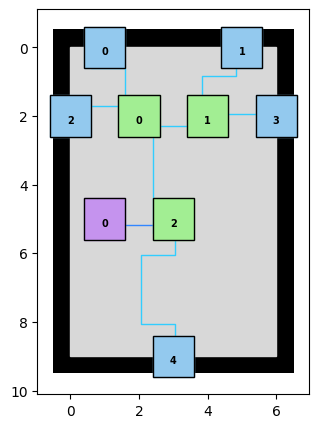

In [68]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = row.BusName                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

## Non bus

In [37]:
algo.Group = True
algo.GroupDict = [1,0,1,2,2]
algo.GroupDict = [1,0,1,0,0]

In [38]:
algo.BusActif = False
algo.Npc = 0
# indiv  = Indiv_reverse('E0-C0,E0-C1,E2-C2,P0-E0,P0-E1,P0-E2',algo)
indiv  = Indiv_reverse('E0-C0,E1-C1,E1-C3,E2-C4,E0-C2,P0-E0,P0-E1,P0-E2',algo)
indiv['Pconnect']

Indiv_reverse [0, 1, 2, 3, 4] [0, 1, 0, 1, 2] [0, 0, 0]


{0: [0, 1, 2]}

In [39]:
def Indiv_Conf(algo, indiv): 
    GroupDict = algo.GroupDict
    # GroupDict
    Econnect = indiv['Econnect']
    Ptype = indiv['Ptype']
    IndivLine = []
    for i, (p,Elist) in enumerate(indiv['Pconnect'].items()):
        pt = Ptype[i]
        for e in Elist:
            gr = collections.defaultdict(list)
            for c in indiv['Econnect'][e]:
                gr[GroupDict[c]].append(c)       

            conf = dict(
                ty = '',
                p = p,
                e = e,
                gr = gr,
                pt = pt,
            )
            IndivLine.append(conf)
    return IndivLine

In [40]:
GroupDict = algo.GroupDict
# GroupDict
Econnect = indiv['Econnect']
Ptype = indiv['Ptype']
IndivLine = []
for i, (p,Elist) in enumerate(indiv['Pconnect'].items()):
    pt = Ptype[i]
    for e in Elist:
        gr = collections.defaultdict(list)
        for c in indiv['Econnect'][e]:
            gr[GroupDict[c]].append(c)       
        
        conf = dict(
            ty = '',
            p = p,
            e = e,
            gr = gr,
            pt = pt,
        )
        print(conf)
        IndivLine.append(conf)
IndivLine
for conf in IndivLine: 
    ty, p, e, gr, pt = conf.values()
    for g,ClistG in gr.items():
        ClistG
        if g == 0 : grouped = False
        else : grouped = True
        debitinput = dict(
            p = p,
            e = e,
            ClistG = ClistG,
            pt = pt,             
        )    
        debit(algo,indiv,debitinput, grouped = grouped, split = False)    

{'ty': '', 'p': 0, 'e': 0, 'gr': defaultdict(<class 'list'>, {1: [0, 2]}), 'pt': 'Pa'}
{'ty': '', 'p': 0, 'e': 1, 'gr': defaultdict(<class 'list'>, {0: [1, 3]}), 'pt': 'Pa'}
{'ty': '', 'p': 0, 'e': 2, 'gr': defaultdict(<class 'list'>, {0: [4]}), 'pt': 'Pa'}


[{'ty': '', 'p': 0, 'e': 0, 'gr': defaultdict(list, {1: [0, 2]}), 'pt': 'Pa'},
 {'ty': '', 'p': 0, 'e': 1, 'gr': defaultdict(list, {0: [1, 3]}), 'pt': 'Pa'},
 {'ty': '', 'p': 0, 'e': 2, 'gr': defaultdict(list, {0: [4]}), 'pt': 'Pa'}]

[0, 2]

{'Qt': 21.5,
 'Pt': 4.26,
 'Qi': array([10.75, 10.75]),
 'Pi': array([4.16, 4.16])}

[1, 3]

{'Qt': array([11.19, 11.2 ]),
 'Pt': array([4.62, 4.62]),
 'Qi': array([11.19, 11.2 ]),
 'Pi': array([4.51, 4.51])}

[4]

{'Qt': array([11.2]),
 'Pt': array([4.63]),
 'Qi': array([11.2]),
 'Pi': array([4.51])}

(10, 7)


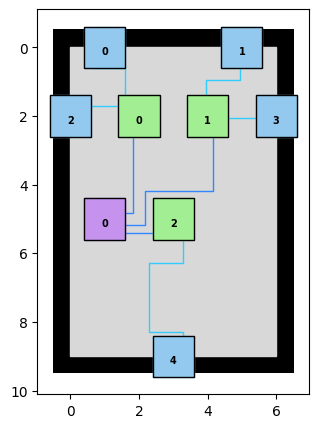

In [41]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = row.BusName                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)

In [131]:
indiv['BusName'] 
indiv['BusDist']
indiv['dist_Connect']

['E0-C0', 'E0-C1', 'E1-C2', 'P0-E0', 'P1-E1']

{'E0-C0': 0.5, 'E0-C1': 0.4, 'E1-C2': 0.4, 'P0-E0': 0.3, 'P1-E1': 0.3}

{'E0-C0': 0.5, 'E0-C1': 0.4, 'E1-C2': 0.4, 'P0-E0': 0.3, 'P1-E1': 0.3}

In [39]:
indiv

{'Clist': [0, 1, 2],
 'CtoE': [0, 1, 2],
 'Econnect': {0: [0], 1: [1], 2: [2]},
 'Elist': [0, 1, 2],
 'Ecount': 3,
 'EtoP': [0, 0, 0],
 'Pconnect': {0: [0, 2]},
 'Plist': [0],
 'Pcount': 1,
 'Ptype0': array(['Pa', 'Pa', 'Pa'], dtype='<U2'),
 'List_EtoC': [['E0-C0'], ['E1-C1'], ['E2-C2']],
 'List_PtoE': [['P0-E0', 'P0-E1', 'P0-E2']],
 'Name': ['E0-C0', 'E1-C1', 'E2-C2', 'P0-E0', 'P0-E1', 'P0-E2'],
 'ID': 10,
 'parent': [],
 'Name_txt': 'E0-C0,E1-C1,E2-C2,P0-E0,P0-E1,P0-E2',
 'Epoch': 0,
 'Option': 'Bus',
 'Ptype': ['Pa', 'Pa', 'Pa'],
 'dist_Connect': {'E0-C0': 0.3,
  'E1-C1': 0.3,
  'E2-C2': 0.2,
  'P0-E0': 0.4,
  'P0-E1': 0.6,
  'P0-E2': 1.0},
 'dist': 240,
 'BusName': ['E0-C0', 'E1-C1', 'E2-C2', 'P0-E0', 'P0-E1', 'E2-E0'],
 'BusDist': {'E0-C0': 0.3,
  'E1-C1': 0.3,
  'E2-C2': 0.2,
  'P0-E0': 0.4,
  'P0-E1': 0.6,
  'P0-E2': 0.6},
 'PtypeCo': {0: ['Pa', 'Pa', 'Pa']},
 'PompesCo': {0: ['Pa']},
 'PompeCount': {'P0': {'Pa': 1}},
 'PompeSum': {'Pa': 1},
 'duriteVal': {'E0-C0': 0.000235,
  '

## test unitaire comme sur tableau excel 

In [12]:
debitinput ={'p': 0, 'e': 0, 'ClistG': [0], 'pt': 'Pa'}
pompe,ev,ClistG,pt = debitinput.values()
d_EtoC_list = np.array([algo.dist['E{}-C{}'.format(ev,c)] for c in ClistG])
d_PtoE      = indiv['dist_Connect']['P{}-E{}'.format(pompe,ev)]
d_EtoC_list, d_PtoE
d_EtoC_list = [1,1,1]
d_PtoE = 1
p = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
p
grouped = True
split = False
cE0 = 7.64e-04
coef_E = 0 if split else cE0

coef_C  = 0.036
coef_C  = [algo.Nvals[i] for i in ClistG]
coef_C  = np.array(coef_C)
coef_d_EtoC  = 2.35e-04
coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(ev,c)] for c in ClistG])
# coef_d_PtoE = algo.duriteVal['P{}-E{}'.format(pompe,ev)] 
coef_d_PtoE = indiv['duriteVal']['P{}-E{}'.format(pompe,ev)] 
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
coef_E ,d_EtoC_list,  coef_d_EtoC, coef_C
a,b,c
A

(array([0.3]), 0.4)

[-0.000516, -0.0154, 4.87]

(0.000764, [1, 1, 1], array([0.000235]), array([0.036]))

(-0.000516, -0.0154, 4.87)

array([0.036999, 0.036999, 0.036999])

In [28]:
%%timeit
Ncg=  2
Ncm = 4
cE0 = 7.64e-04
coef_E =  cE0
d_EtoC_list = np.ones(Ncg) * 1
coef_d_EtoC = np.ones(Ncg) * 0.000235
coef_C      = np.ones(Ncg) * 0.036
# A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 

Q0 = np.arange(0.1,80)
Qx = np.zeros(Q0.shape)
# Qi = np.zeros((Ncm,len(Q0)))
Qi = []

G = a * Q0**2 + b*Q0 +c
Nev = int(Ncm/Ncg)
coef_d_PtoE = np.ones(Nev) * 0.000235
Qlist = []

for i in range(Nev):
    G = G - coef_d_PtoE[i]*(Q0-Qx)**2
    G[G <0] = 0
    A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
    Qlist.append(np.sqrt(G / A[:,np.newaxis]))
    Qi = np.vstack(Qlist)
    Qx = Qi.sum(0)
#     Qi.shape
#     Qi[i*Ncg:Ncg*(i+1),:] = np.sqrt(G / A[i*Ncg:Ncg*(i+1),np.newaxis])
#     Qx = Qi.sum(0)

idx = np.searchsorted(Q0 - Qx, -0)
idx,Q0[idx],Qx[idx]

# idx, Q0[idx],Qx[idx], Qi[:,idx], Qi.shape, G[idx]

83.3 µs ± 728 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [30]:
%%timeit
Ncg=  6
Ncm = 60
cE0 = 7.64e-04
coef_E =  cE0
d_EtoC_list = np.ones(Ncg) * 1
coef_d_EtoC = np.ones(Ncg) * 0.000235
coef_C      = np.ones(Ncg) * 0.036
# A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 

Q0 = np.arange(0.1,80)
Qx = np.zeros(Q0.shape)
# Qi = np.zeros((Ncm,len(Q0)))
Qi = []

G = a * Q0**2 + b*Q0 +c
Nev = int(Ncm/Ncg)
coef_d_PtoE = np.ones(Nev) * 0.000235
Qlist = []

for i in range(Nev):
    G = G - coef_d_PtoE[i]*(Q0-Qx)**2
    G[G <0] = 0
    A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
    Qlist.append(np.sqrt(G / A[:,np.newaxis]))
    Qi = np.vstack(Qlist)
    Qx = Qi.sum(0)
#     Qi.shape
#     Qi[i*Ncg:Ncg*(i+1),:] = np.sqrt(G / A[i*Ncg:Ncg*(i+1),np.newaxis])
#     Qx = Qi.sum(0)

idx = np.searchsorted(Q0 - Qx, -0)
idx,Q0[idx],Qx[idx]

# idx, Q0[idx],Qx[idx], Qi[:,idx], Qi.shape, G[idx]

351 µs ± 5.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


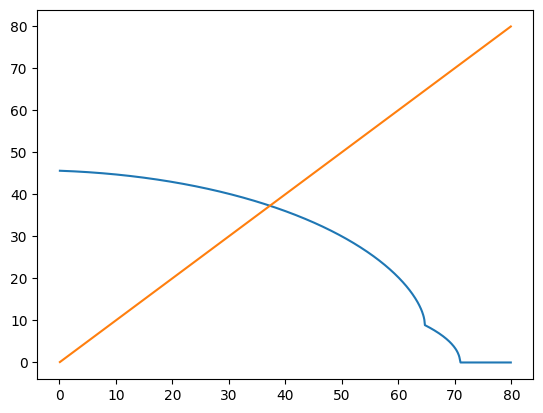

In [18]:
f = plt.plot(Q0,Qx)
f = plt.plot(Q0,Q0)

## debit test unitaire indiv 

In [63]:
indiv['duriteVal']

{'E0-C0': 0.000235,
 'E0-C1': 0.000235,
 'E2-C2': 0.000235,
 'P0-E0': 0.000235,
 'P0-E2': 0.000235}

In [ ]:
indiv['']

In [36]:
IndivLine

[{'ty': '',
  'p': 0,
  'e': [0, 2],
  'gr': defaultdict(list, {1: [0, 2], 0: [1]}),
  'pt': 'Pa',
  'bus': {0: {0: [1]}, 1: {0: [0], 2: [2]}}}]

In [21]:
IndivLine

[{'ty': '',
  'p': 0,
  'e': [2, 0, 1],
  'gr': {0: [4, 1, 3], 1: [0, 2]},
  'pt': 'Pa',
  'bus': {0: {2: [4], 1: [1, 3]}, 1: {0: [0, 2]}}}]

In [24]:
line['bus']

{0: {2: [4], 1: [1, 3]}, 1: {0: [0, 2]}}

In [23]:
# %%timeit
ClistDict = {0:[0,1,2], 1:[3]}
ClistDict = {0:[0,1], 1 : [2]}
ClistDict = {0:[0,1]}
ClistDict = {1:[2], 0: [0,1]}
 
PtoElist = ['P0-E0','P0-E2']
line = IndivLine[0]
ClistDict = line['bus'][1]
ClistDict
PtoElist = ['P{}-E{}'.format(0,e) for e in line['e']]
EvList = [0,1]
pompe = 0
# coef_PtoE = [indiv['duriteVal'][line] * indiv['BusDist'][line] for line in PtoElist]
# coef_PtoE
coef_PtoE = [indiv['duriteVal'][line] * indiv['BusDist'][line] for line in PtoElist]
pt = 'Pa'
Q0 = np.arange(0.1,80,0.1)
Qx = 0

a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
G = a * Q0**2 + b*Q0 +c

Qlist = []
Alist = []
for i, (e,EClist) in enumerate( ClistDict.items()): # changer en list pour avoir l'ordre !!
    print(i, e,EClist)
    coef_C  = [algo.Nvals[i] for i in EClist]
    coef_C  = np.array(coef_C)
    d_EtoC = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in EClist])
    coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(e,c)] for c in EClist])
    coef_E = 7.64e-04  
#     print(d_EtoC)

    G = G - coef_PtoE[i]*(Q0-Qx)**2
    G[G<0] = 0
    A = coef_E + d_EtoC * coef_d_EtoC + coef_C 
    print(coef_E ,d_EtoC , coef_d_EtoC ,coef_C,  A)
    Alist.append(A)
    Qlist.append(np.sqrt(G / A[:,np.newaxis]))
    Qi = np.vstack(Qlist)  # a essayer de passer en append coté numpy 
    Qx = Qi.sum(0)
#     Qi.shape
idx = np.searchsorted(Q0 - Qx, -1)
# idx
Qi = np.vstack(Qlist)[:,idx]
Qi
# Alist
'Alist',Alist
Pi = np.concatenate(Alist)* (Qi**2)
Pi

{0: [0, 2]}

0 0 [0, 2]
0.000764 [0.3 0.2] [0.000235 0.000235] [0.036 0.036] [0.0368345 0.036811 ]


array([10.81708505, 10.82053729])

('Alist', [array([0.0368345, 0.036811 ])])

array([4.30998013, 4.30998013])

In [188]:
Calcul_Debit(algo ,indiv, 'Deactivate')

{'p': 0, 'e': 0, 'ClistG': [0, 1], 'pt': 'Pa'}
{'p': 0, 'e': 1, 'ClistG': [2], 'pt': 'Pa'}


{'PressionList': [4.5, 4.5, 4.52],
 'DebitList': [11.18, 11.18, 11.2],
 'Esplit': {0: [0, 1], 1: [2]},
 'Debit': 33.6}

In [30]:
indiv['Econnect'], indiv['Pconnect']
indiv['List_EtoC']
indiv['List_PtoE']

({0: [0, 1], 1: [2]}, {0: [0, 1]})

[['E0-C0', 'E0-C1'], ['E1-C2']]

[['P0-E0', 'P0-E1']]

## conf indiv line  echec 

In [ ]:
{'ty': '',
 'p': 0,
 'e': [0, 2],
 'gr': defaultdict(list, {1: [0, 2], 0: [1]}),
 'pt': 'Pa',
 'bus': {0: {0: [1]}, 1: {0: [0], 2: [2]}}}

In [45]:
d = {'data' : 
     [
         {'ty': 'bus',
          'p': 0,
          'e': [0, 2],
          'gr': {1: [0, 2], 0: [1]},
          'pt': 'Pa',
          'bus': {0: {0: [1]}, 1: {0: [0], 2: [2]}}}]}

In [47]:
with open('indivconf.json', 'w') as outfile:
    json.dump(d, outfile)

In [ ]:
json.

## func (2ieme partie a lire) 

In [37]:
line

{'ty': '',
 'p': 0,
 'e': [0, 1],
 'gr': {1: [0, 2, 3], 0: [1]},
 'pt': 'Pa',
 'bus': {0: {1: [1]}, 1: {0: [0, 2], 1: [3]}}}

In [39]:
bus

{0: {1: [1]}, 1: {0: [0, 2], 1: [3]}}

In [42]:
bus = {0 : {1: [0]}}

In [18]:
line = IndivLine[0]
# line
bus = line['bus']
# loop sur les gr avec les clisdict d'avant  
for n , ClistDict in bus.items():
    ClistDict
    # ClistDict = line['bus'][1]
    PtoElist = ['P{}-E{}'.format(0,e) for e in line['e']]
# #     EvList = [0,1]
#     EvList = ClistDict.keys()
    pompe = 0 # a changer 
    coef_PtoE = [indiv['duriteVal'][line] * indiv['BusDist'][line] for line in PtoElist] # tres important puisque ordre de calucl a respecter 
    coef_PtoE
    pt = 'Pa'
    Q0 = np.arange(0.1,80,0.1)
    Qx = 0

    a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
    G = a * Q0**2 + b*Q0 +c

    Qlist = []
    Alist = []
    for i, (e,EClist) in enumerate(ClistDict.items()): # changer en list pour avoir l'ordre !!
        print(i, e,EClist)
        # calcul des coef comme avant 
        coef_C = [algo.Nvals[i] for i in EClist]
        coef_C = np.array(coef_C)
        d_EtoC = np.array([algo.dist['E{}-C{}'.format(e,c)] for c in EClist])
        coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(e,c)] for c in EClist])
        coef_E = 7.64e-04  
        
        # new si pas de capteur on a juste le coef de droite = 0 normalement 
        # le truc c'est quil faudra faire cette loop dans le cas de group ou le premier Ev dn'est pas activer 
        # donc prendre en compte pour le calcul de coef_PtoE
        G = G - coef_PtoE[i]*(Q0-Qx)**2
        G[G<0] = 0
        A = coef_E + d_EtoC * coef_d_EtoC + coef_C 
        print(coef_E ,d_EtoC , coef_d_EtoC ,coef_C,  A)
        Alist.append(A)
        # magie on tile la mtrice sur A step correspond au tableau excel etendu sur la droite
        Qlist.append(np.sqrt(G / A[:,np.newaxis]))
        Qi = np.vstack(Qlist)  # a essayer de passer en append coté numpy 
        Qx = Qi.sum(0)
    #     Qi.shape
    # le offset de -1 pour retrouver la plus proche valeur de Q0 -Qx facile 
    idx = np.searchsorted(Q0 - Qx, -1)
    # idx
    Qi = np.vstack(Qlist)[:,idx]
    Qi
    # Alist
    'Alist',Alist
    Pi = np.concatenate(Alist)* (Qi**2)
    Pi

{2: [4], 1: [1]}

[4.7000000000000004e-05, 9.400000000000001e-05, 4.7000000000000004e-05]

0 2 [4]
0.000764 [0.6] [0.000235] [0.036] [0.036905]
1 1 [1]
0.000764 [0.3] [0.000235] [0.036] [0.0368345]


array([10.80674812, 10.80553343])

('Alist', [array([0.036905]), array([0.0368345])])

array([4.30998013, 4.30077975])

{0: [0, 2], 1: [3]}

[4.7000000000000004e-05, 9.400000000000001e-05, 4.7000000000000004e-05]

0 0 [0, 2]
0.000764 [0.3 0.2] [0.000235 0.000235] [0.036 0.036] [0.0368345 0.036811 ]
1 1 [3]
0.000764 [0.2] [0.000235] [0.036] [0.036811]


array([10.29794424, 10.3012308 , 10.29050326])

('Alist', [array([0.0368345, 0.036811 ]), array([0.036811])])

array([3.90621237, 3.90621237, 3.89808087])

In [11]:
Calcul_Debit(algo ,indiv, False)

{'PressionList': [3.92, 4.51, 3.92, 4.51, 4.51],
 'DebitList': [10.44, 11.19, 10.44, 11.19, 11.2],
 'Esplit': {0: [(0, 2)], 1: [1, 3], 2: [4]},
 'Debit': 54.5}

## Calcul debit test refacto

In [123]:
 D = algo.Comb  
Group = algo.Group
GroupDict = algo.GroupDict 
# print(GroupDict)
Clist = D['C']
Econnect = indiv['Econnect']
Pconnect = indiv['Pconnect']
dist_Connect = indiv['dist_Connect']
EtoP = indiv['EtoP']
Ptype = indiv['Ptype']
Pression = []
Debit = []

Cpression = {}
Cdebit = {}

In [127]:
GroupDict

[0, 1, 1]

In [126]:
indiv['Option']

'Bus'

In [125]:
GroupDict , Econnect, Pconnect

d1 = collections.defaultdict(list)
d2 = collections.defaultdict(list)
for i, (e,EClist) in enumerate(Econnect.items()):
    for e2 in EClist :
        d2

([0, 1, 1], {0: [0, 1], 1: [2]}, {0: [0, 1]})

# TEST ancien

## NETWORK X testé

In [88]:
dfslot = pd.DataFrame(algo.DictPos).T
dfslot.columns = ('y','x')
dfslot

,y,x
C0,0,1
C1,0,5
C2,2,0
E0,2,2
E1,2,4
C3,2,6
P0,5,1
E2,5,3
P1,5,5
E3,7,3


In [64]:
algo.DictPos

{'C0': (0, 1),
 'C1': (0, 5),
 'C2': (2, 0),
 'E0': (2, 2),
 'E1': (2, 4),
 'C3': (2, 6),
 'P0': (5, 1),
 'E2': (5, 3),
 'P1': (5, 5),
 'E3': (7, 3),
 'C4': (9, 3)}

In [84]:
dfline = algo.dfline
dfline['s'] = dfline.ID.str.split('-').str[0]
dfline['t'] = dfline.ID.str.split('-').str[1]

In [85]:
G=nx.from_pandas_edgelist(dfline, 's', 't', ['dist', 'duriteVal'])

In [86]:
node_attr = dfslot.to_dict('index')
nx.set_node_attributes(G, node_attr)

In [52]:
list(G.edges.data())

[('a', 'b', {'weight': 2}), ('b', 'c', {'weight': 4})]

In [54]:
nx.__version__

'3.1'

In [79]:
%%timeit
G=nx.from_pandas_edgelist(dfline, 's', 't', ['dist', 'duriteVal'])

90.7 µs ± 997 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


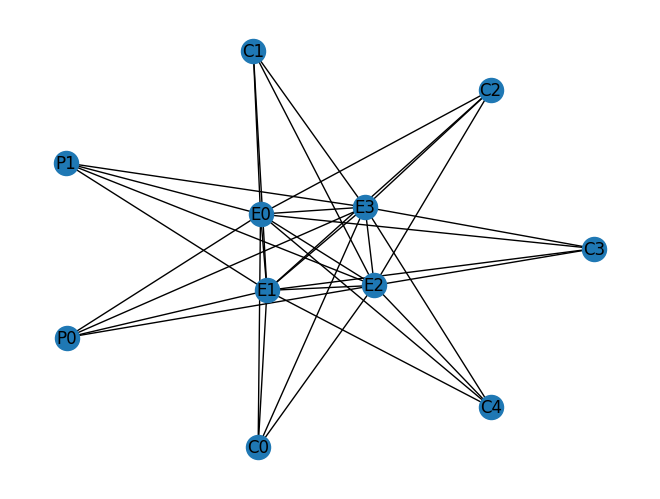

In [87]:
nx.draw(G, with_labels=True)
plt.show()

In [190]:
nx.get_edge_attributes(G, "dist")

{('E0', 'C0'): 0.3,
 ('E0', 'C1'): 0.5,
 ('E0', 'C2'): 0.2,
 ('E0', 'C3'): 0.6,
 ('E0', 'C4'): 0.8,
 ('E0', 'P0'): 0.4,
 ('E0', 'P1'): 0.6,
 ('E0', 'E1'): 0.2,
 ('E0', 'E2'): 0.4,
 ('E0', 'E3'): 0.6,
 ('C0', 'E1'): 0.5,
 ('C0', 'E2'): 0.7,
 ('C0', 'E3'): 0.9,
 ('C1', 'E1'): 0.3,
 ('C1', 'E2'): 0.7,
 ('C1', 'E3'): 0.9,
 ('C2', 'E1'): 0.6,
 ('C2', 'E2'): 0.6,
 ('C2', 'E3'): 0.8,
 ('C3', 'E1'): 0.2,
 ('C3', 'E2'): 0.6,
 ('C3', 'E3'): 0.8,
 ('C4', 'E1'): 0.8,
 ('C4', 'E2'): 0.6,
 ('C4', 'E3'): 0.2,
 ('P0', 'E1'): 0.6,
 ('P0', 'E2'): 0.2,
 ('P0', 'E3'): 0.4,
 ('P1', 'E1'): 0.4,
 ('P1', 'E2'): 0.2,
 ('P1', 'E3'): 0.4,
 ('E1', 'E2'): 0.4,
 ('E1', 'E3'): 0.6,
 ('E2', 'E3'): 0.2}

In [77]:
%%timeit
dfline.loc[(dfline.s == 'P0') & (dfline.t == 'E0')]

337 µs ± 3.22 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [82]:
%%timeit
dfline[(dfline.ID == 'P0-E0')].dist.values

233 µs ± 9.96 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [75]:
%%timeit
G.edges["P0",'E0']['dist']

253 ns ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [ ]:
G

In [70]:
H = G.subgraph(['P0','E0'])

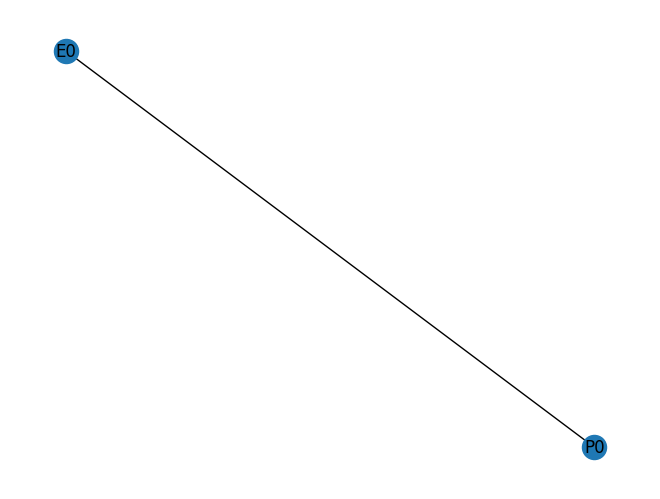

In [71]:
nx.draw(H, with_labels=True)
plt.show()

In [25]:
G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc

H = G.subgraph([0, 1, 2])
list(G.edges) , list(H.edges)

([(0, 1), (1, 2), (2, 3)], [(0, 1), (1, 2)])

In [30]:
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_edge("a", "b", weight=2)
G.add_edge("b", "c", weight=4)
G.size()
2
G.size(weight="weight")

2

2

6.0

In [27]:
%%timeit
G.size(weight="weight")

3.79 µs ± 85.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [45]:
%%timeit
sum([w['weight'] for u,v, w  in G.edges(data=True)])

2.89 µs ± 76.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## GEN test

In [ ]:
# columns de l'algo genetique
col = ['Clist', 'CtoE', 'Econnect', 'Elist', 'Ecount', 'EtoP', 'Pconnect','Plist', 'Pcount']

In [ ]:
# crossover
dfparents = df[:2].copy()
dfcrossover = pd.DataFrame(AG_CrossOver(dfparents, algo))
dfresults  = pd.concat([dfparents.T,dfcrossover.T ], axis = 1)
dfresults.columns = ['parent1','parent2','enfant1','enfant2']
dfresults.loc[col]

In [ ]:
# mutation
row = df.iloc[0].copy()
dfMutation = pd.Series(Mutation(row, algo))[col]
dfresults  = pd.concat([row,dfMutation], axis = 1)
dfresults.columns = ['parent','enfant']
dfresults.loc[col]

## new formule vrac

In [ ]:
df.columns
indiv = algo.indivs[0]
Calcul_Debit(algo ,indiv, Split = algo.Split)

In [ ]:
Calcul_Debit(algo ,indiv, 'Deactivate')

In [ ]:
debitinput = {'p': 0, 'e': 0, 'ClistG': [0, 1, 3], 'pt': 'Pa'}
debit(algo,indiv,debitinput, grouped = True, split = False)

In [ ]:
pompe,ev,ClistG,pt = debitinput.values()
d_EtoC_list = np.array([algo.dist['E{}-C{}'.format(ev,c)] for c in ClistG])
d_PtoE      = indiv['dist_Connect']['P{}-E{}'.format(pompe,ev)]
d_EtoC_list, d_PtoE
d_EtoC_list = [1,1,1]
d_PtoE = 1
p = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
p
grouped = True
split = False
cE0 = 7.64e-04
coef_E = 0 if split else cE0

coef_C  = 0.036
coef_C  = [algo.Nvals[i] for i in ClistG]
coef_C  = np.array(coef_C)
coef_d_EtoC  = 2.35e-04
coef_d_EtoC = np.array([algo.duriteVal['E{}-C{}'.format(ev,c)] for c in ClistG])
# coef_d_PtoE = algo.duriteVal['P{}-E{}'.format(pompe,ev)] 
coef_d_PtoE = indiv['duriteVal']['P{}-E{}'.format(pompe,ev)] 
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
coef_E ,d_EtoC_list,  coef_d_EtoC, coef_C
A

In [ ]:
Q = 40
A*10
a * Q**2 + b*Q +c - coef_d_PtoE*Q**2
a * Q**2 + b*Q +c - coef_d_PtoE


In [ ]:
coef_E
Ncg=  6
Ncm = 12
d_EtoC_list = np.ones(Ncm) * 1
coef_d_EtoC = np.ones(Ncm) * 0.000235
coef_C = np.ones(Ncm) * 0.036
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
A = coef_E + d_EtoC_list * coef_d_EtoC + coef_C 
Q0 = np.arange(0.1,80,0.1)
Qx = np.zeros(Q0.shape)
Qi = np.zeros((12,len(Q0)))
Nev = int(Ncm/6)
for i in range(Nev):
    Q = Q0 - Qx
    # Q.shape, Qx.sum()    
    # Q = Q0.copy()
    # Q.shape
    G = a * Q**2 + b*Q +c - coef_d_PtoE*(i+1)*Q**2
    G[G <0] = 0
    # print(G)
    Qi[i*Ncg:Ncg*(i+1),:] = np.sqrt(G / A[i*Ncg:Ncg*(i+1),np.newaxis]).round(3)
    Qx = Qi[0:Ncg*(i+1),:].sum(0)
    # Qx
    # pd.DataFrame(Qi)
    # Qx.shape
    f = plt.plot(Qx)
    # Qi.shape
dfr = pd.DataFrame(Qi).T
dfr.index = Q0
idx = np.searchsorted(Q0 - Qi.sum(0), 0)
np.isclose(Qi.sum(0),Q0,atol= 0.1).sum()
# np.isclose(Qi.sum(0),Q,atol= 0.1)
idx, Q[idx],Qi[:,idx], Qi.shape, G[idx]

In [ ]:
a,b,c = [algo.DataCategorie['Pompe']['Values'][pt][i] for i in ['a','b','c']]
a,b,c

In [ ]:

Q = np.arange(0.1,80,0.1)
G = a * Q**2 + b*Q +c - coef_d_PtoE
Qi= np.sqrt(G / A[:,np.newaxis])
Q[np.isclose(Qi.sum(0),Q,atol= 0.1)]
Qi[:,np.isclose(Qi.sum(0),Q,atol= 0.1)]
idx = np.searchsorted(Q - Qi.sum(0), 0)
Q[idx],Qi[:,idx]
Qi.shape
# Q[np.isclose(Qi.sum(0),Q,atol= 0.1)]

In [ ]:
%timeit np.isclose(Qi.sum(0),Q,atol= 0.1)
%timeit np.searchsorted(Q - Qi.sum(0), 0.1)


In [ ]:
Qi.sum(0) - Q

In [ ]:
%%timeit
G = a * Q**2 + b*Q +c - coef_d_PtoE
Qi= np.sqrt(G / A[:,np.newaxis])


In [ ]:
p = np.array(p)

In [ ]:
%%timeit
Q = 40
Qs = []
for i in range(40):
    G = a * Q**2 + b*Q +c - coef_d_PtoE
    Qi= np.sqrt(G / A)
    Q = np.sum(Qi)
    Qs.append(Q)

In [ ]:

Q = 40
Qs = []
for i in range(40):
    G = a * Q**2 + b*Q +c - coef_d_PtoE
    Qi= np.sqrt(G / A)
    Q = np.sum(Qi)
    Qs.append(Q)
plt.plot(Qs)
Qs[-1]
# Qi


In [ ]:
indiv['dist_Connect']
A

In [ ]:
pd.Series(indiv)

## test bus  T

## test bus connection T

In [15]:
dist_Connect = indiv['dist_Connect']
New_dist_Connect = copy.deepcopy(dist_Connect)
BusName = copy.deepcopy(indiv['Name'])
Pconnect = copy.deepcopy(indiv['Pconnect'])

dfx0 = algo.dfline.copy()
dfx0['a'] = dfx0.ID.str.split('-').str[0]
dfx0['b'] = dfx0.ID.str.split('-').str[1]

NameListNew  = []
DictMapName = {}
BusConnectDict = []

for i, (p,Elist) in enumerate(Pconnect.items()): 
    break
# p,Elist = Pconnect.items()  
print(i, (p,Elist))
# Elist.pop(1)

s = 'P{}'.format(p)
ElistName = ['E{}'.format(e) for e in Elist]
ListMask = [s] + ElistName
ListMask
mask0 = dfx0.a.isin(ListMask) & dfx0.b.isin(ListMask)
dfx = dfx0[mask0].copy()
path,dist,lines = [s] ,[], []
# pour chaque slot de P commence avec s = Px et avance par iter sur le plus proche E & crop  dfx = dfline 
# l'astuce c'est que qu'on conserve les lines P-E mais en changeant les valeurs de dist

while len(dfx)>0:
    dfx
    mask = dfx.ID.str.contains(s)
    x  = dfx[mask].dist.values.argmin()    
    cx = dfx[mask][['a','b']].iloc[x].values
    cx
    line = dfx[mask].iloc[x].ID
    lines.append(line)
    NameListNew.append(line)
    dist.append(dfx[mask].dist.values.min())    
#     dfx = dfx[~mask]
    s2 = cx[cx!=s][0]
    s2
    mask = dfx.ID.str.contains(s2)
    dfx = dfx[~mask]
#     dfx
    path.append(s2)
    
path
lines
# distCumsum = np.array(dist).cumsum()
# PxConnect = ['{}-{}'.format(path[0],s) for s in path[1:]]
# DictMapName.update(dict(zip(PxConnect,lines)))
# # print(p,Elist, PxConnect)   
# d = dict(zip(PxConnect,distCumsum))
# #     BusConnectDict[p].append()
# New_dist_Connect.update(d)
# print('bus',path[0], p,Elist, PxConnect,path,lines,dist, distCumsum, New_dist_Connect)

0 (0, [0, 1])


['P0', 'E0', 'E1']

,ID,path,dist,duriteType,duriteVal,a,b
5,P0-E0,"[[2, 2], [3, 2], [4, 2], [5, 2], [5, 1]]",0.4,4,0.000235,P0,E0
12,P0-E1,"[[2, 4], [3, 4], [4, 4], [4, 3], [4, 2], [5, 2...",0.6,4,0.000235,P0,E1
28,E1-E0,"[[2, 2], [2, 3], [2, 4]]",0.2,4,0.000235,E1,E0


array(['P0', 'E0'], dtype=object)

'E0'

,ID,path,dist,duriteType,duriteVal,a,b
12,P0-E1,"[[2, 4], [3, 4], [4, 4], [4, 3], [4, 2], [5, 2...",0.6,4,0.000235,P0,E1


array(['P0', 'E1'], dtype=object)

'E1'

['P0', 'E0', 'E1']

['P0-E0', 'P0-E1']

In [17]:
indiv['BusName']

['E0-C0', 'E0-C2', 'E1-C1', 'E1-C3', 'E2-C4', 'P0-E0', 'E1-E0', 'P0-E2']

(10, 7)


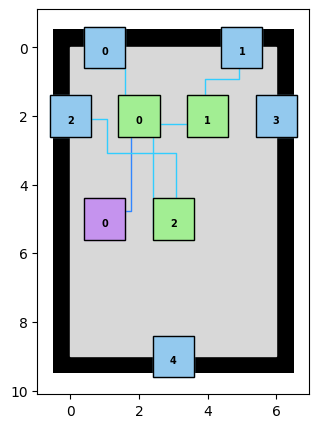

In [16]:
# Plot
row = pd.Series(indiv)
ElemsList = ['Clist','Elist','Plist']
Elems = ['C','E','P']
SelectSlot = []
List_EtoC = row.List_EtoC
List_PtoE = row.List_PtoE
for n in range(3):
    SelectSlot+= ['{}{}'.format(Elems[n],i) for i in row[ElemsList[n]]]
SelectLine = row.Name
if row.Option == 'Bus' :   SelectLine = ['E0-C0', 'E1-C1', 'E2-C2', 'P0-E0', 'E1-E0', 'E2-E0']                
fig = new_plot(algo, SelectLine, SelectSlot)
fig.set_size_inches(5,5)